In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings 
warnings.filterwarnings ("ignore")

In [2]:
lockdown=pd.read_csv('lockdown_dates_wikipedia.csv')
lockdown

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,third_lockdown_start_date,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
0,Albania,AL,Albania,2020-03-13,2020-06-01,80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,National
1,Algeria,DZ,Algiers,2020-03-23,2020-05-14,52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,City
2,Algeria,DZ,Blida,2020-03-23,2020-05-14,52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,City
3,Argentina,AR,Greater Buenos Aires,2020-03-19,2020-11-08,234,2021-05-22,2021-05-30,9,2021-06-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,Metropolitan area
4,Argentina,AR,Rest of the country,2020-03-19,2020-05-10,52,2021-05-22,2021-05-30,9,2021-06-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Vietnam,VN,Da Nang,NaN,NaN,21,2020-07-28,2020-09-05,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,City
235,Vietnam,VN,Hai Duong,NaN,NaN,21,2021-02-16,2021-03-02,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,"Province, Chi Linh city lockdown began from 28..."
236,Vietnam,VN,Bac Ninh,NaN,NaN,21,2021-05-18,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,4 districts and 1 city
237,Vietnam,VN,Bac Giang,NaN,NaN,21,2021-05-18,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,6 districts


In [3]:
df2019Q1=pd.read_csv('2019Q1.csv',skiprows=4)
df2019Q2=pd.read_csv('2019Q2.csv',skiprows=4)
df2019Q3=pd.read_csv('2019Q3.csv',skiprows=4)
df2019Q4=pd.read_csv('2019Q2.csv',skiprows=4)
df2020Q1=pd.read_csv('2020Q1.csv',skiprows=4)
df2020Q2=pd.read_csv('2020Q2.csv',skiprows=4)
df2020Q3=pd.read_csv('2020Q3.csv',skiprows=4)
df2020Q4=pd.read_csv('2020Q4.csv',skiprows=4)
# 2021Q1 added for covering the lockdown dates
df2021Q1=pd.read_csv('waqi-covid19-airqualitydata-2021Q1.csv',skiprows=4)

In [4]:
df2020Q4

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-12-23,ET,Addis Ababa,pm25,24,30.0,167.0,46.0,20293.80
1,2020-10-12,ET,Addis Ababa,pm25,24,55.0,119.0,68.0,3372.88
2,2020-10-17,ET,Addis Ababa,pm25,24,50.0,153.0,72.0,4770.42
3,2020-11-25,ET,Addis Ababa,pm25,23,42.0,137.0,68.0,5971.58
4,2020-11-27,ET,Addis Ababa,pm25,24,30.0,82.0,46.0,1686.88
...,...,...,...,...,...,...,...,...,...
586932,2020-12-31,PL,Kraków,o3,144,1.7,8.1,4.6,28.32
586933,2021-01-03,PL,Kraków,o3,144,0.5,7.1,2.1,30.05
586934,2020-10-12,PL,Kraków,o3,144,4.6,16.0,12.7,81.38
586935,2020-10-16,PL,Kraków,o3,144,1.2,5.9,3.5,18.86


In [5]:
df2021Q1.isna().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

# EDA

In [6]:
Airquality2019_2020=pd.concat([df2019Q1,df2019Q2,df2019Q3,df2019Q4,df2020Q1,df2020Q2,df2020Q3,df2020Q4,df2021Q1],axis=0)
Airquality2019_2020

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97
...,...,...,...,...,...,...,...,...,...
1834049,2021-06-07,PH,Zamboanga,co,3,11.2,11.2,11.2,0.00
1834050,2021-06-09,PH,Zamboanga,co,3,11.2,11.2,11.2,0.00
1834051,2021-06-18,PH,Zamboanga,co,3,11.2,11.2,11.2,0.00
1834052,2021-05-11,PH,Zamboanga,so2,2,149.9,258.2,149.9,58644.40


In [7]:
Airquality2019_2020['Specie'].unique()

array(['pm10', 'humidity', 'o3', 'so2', 'wind-speed', 'wind-gust', 'dew',
       'pm25', 'no2', 'pressure', 'temperature', 'precipitation', 'co',
       'wd', 'uvi', 'aqi', 'pm1', 'mepaqi', 'pol', 'wind speed',
       'wind gust', 'neph'], dtype=object)

###### mean estimation

###### Estimating the mean from the median, range, and the size of a sample
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1097734/
let<br>
a be min of the sample <br>
b max of the sample <br>
n size of the sample count <br>
then <br>
$\bar{x}=\frac{a+2m+b}{4} + \frac{a-2m +b }{4n}$(1)
<br> if the size of the sample is fairly large the second fraction becomes negligible and the formula becomes <br>
$\bar{x}=\frac{a+2m+b}{4}$ (2)<br>
large simple size is greater than 30 https://www.statology.org/large-sample-condition/


In [8]:
df_grt30=Airquality2019_2020[Airquality2019_2020['count']>30]
df_ls30=Airquality2019_2020[Airquality2019_2020['count']<=30]

In [9]:
# estimating mean
df_grt30['mean']=(df_grt30['min'] +2*df_grt30['median'] + df_grt30['max'])/4
df_ls30['mean']=((df_ls30['min'] +2*df_ls30['median'] + df_ls30['max'])/4 )+(df_ls30['min']- 2*df_ls30['median'] + df_ls30['max'])/(4*df_ls30['count'])

In [10]:
df_2019_2020=pd.concat([df_ls30,df_grt30],axis=0)


In [11]:
df_2019_2020['Std']=np.sqrt(df_2019_2020['variance'])
df_2019_2020

,Date,Country,City,Specie,count,min,max,median,variance,mean,Std
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40,94.656250,13.394029
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75,54.479167,4.873397
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96,157.135417,30.691367
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88,73.822917,31.731372
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97,87.260417,7.613803
...,...,...,...,...,...,...,...,...,...,...,...
1833530,2020-12-29,PH,Butuan,pm10,47,1.0,53.0,11.0,2609.57,19.000000,51.083951
1833540,2020-12-30,PH,Butuan,pm10,48,1.0,71.0,10.0,3240.78,23.000000,56.927849
1833545,2021-01-02,PH,Butuan,pm10,45,1.0,73.0,10.0,3222.09,23.500000,56.763457
1833546,2021-01-03,PH,Butuan,pm10,36,1.0,26.0,5.0,341.36,9.250000,18.475930


Joining datasets

# INDIA

### Airquality

In [12]:
df_2019_2020.rename(columns={'Country':'country_code'},inplace=True)
 

In [13]:
df_Airqualty_india=df_2019_2020[df_2019_2020['country_code']=='IN'].reset_index(drop=True)

In [14]:
df_Airqualty_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248624 entries, 0 to 248623
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          248624 non-null  object 
 1   country_code  248624 non-null  object 
 2   City          248624 non-null  object 
 3   Specie        248624 non-null  object 
 4   count         248624 non-null  int64  
 5   min           248624 non-null  float64
 6   max           248624 non-null  float64
 7   median        248624 non-null  float64
 8   variance      248624 non-null  float64
 9   mean          248624 non-null  float64
 10  Std           248624 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 20.9+ MB


In [15]:
# converting dates to date time
df_Airqualty_india['Date'] = pd.to_datetime(df_Airqualty_india['Date'])

In [16]:
df_Airqualty_india['Specie'].unique()

array(['temperature', 'humidity', 'pm25', 'pressure', 'precipitation',
       'o3', 'so2', 'wind-speed', 'dew', 'co', 'no2', 'pm10', 'wind-gust',
       'wind speed', 'wind gust', 'wd'], dtype=object)

###### let'us check the distribution of the estimated mean for each specie

In [17]:
def boxplot_by_specie(spec):
    df_Airqualty_india_specie=df_Airqualty_india.groupby('Specie')
    df_Airqualty_india_species=df_Airqualty_india_specie.get_group(spec)
    data=[df_Airqualty_india_species['mean'],df_Airqualty_india_species['median']]
    plt.figure(figsize = (15,15))
    plt.style.use('fivethirtyeight')
    plt.boxplot(data)
    plt.xticks([1, 2], ['mean', 'median'])
    plt.show()
    #['pm25','o3', 'so2', 'co', 'no2', 'pm10']
    return plt.show()


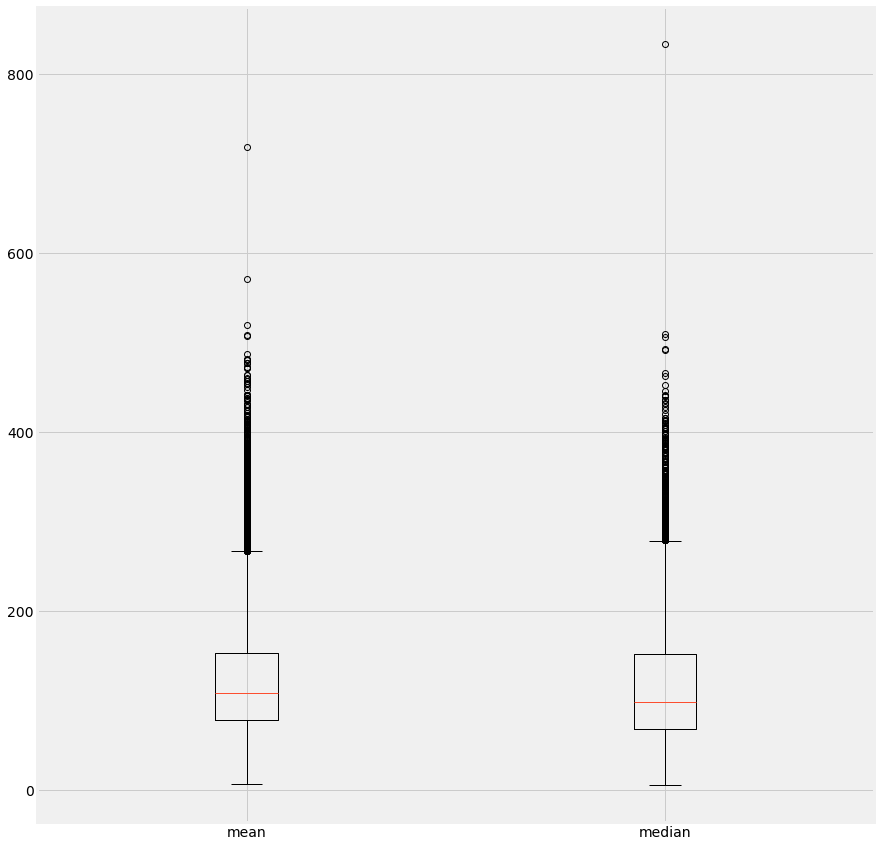

In [18]:
boxplot=boxplot_by_specie('pm25')

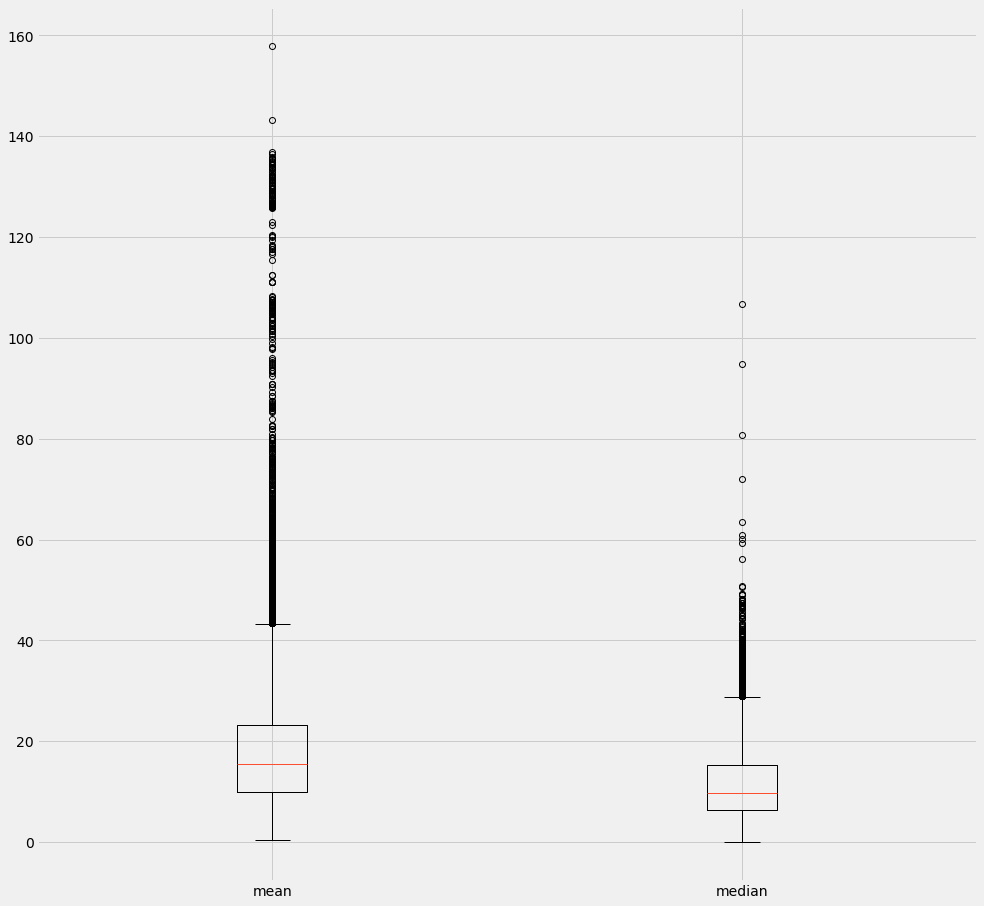

In [19]:
boxplot=boxplot_by_specie('o3')

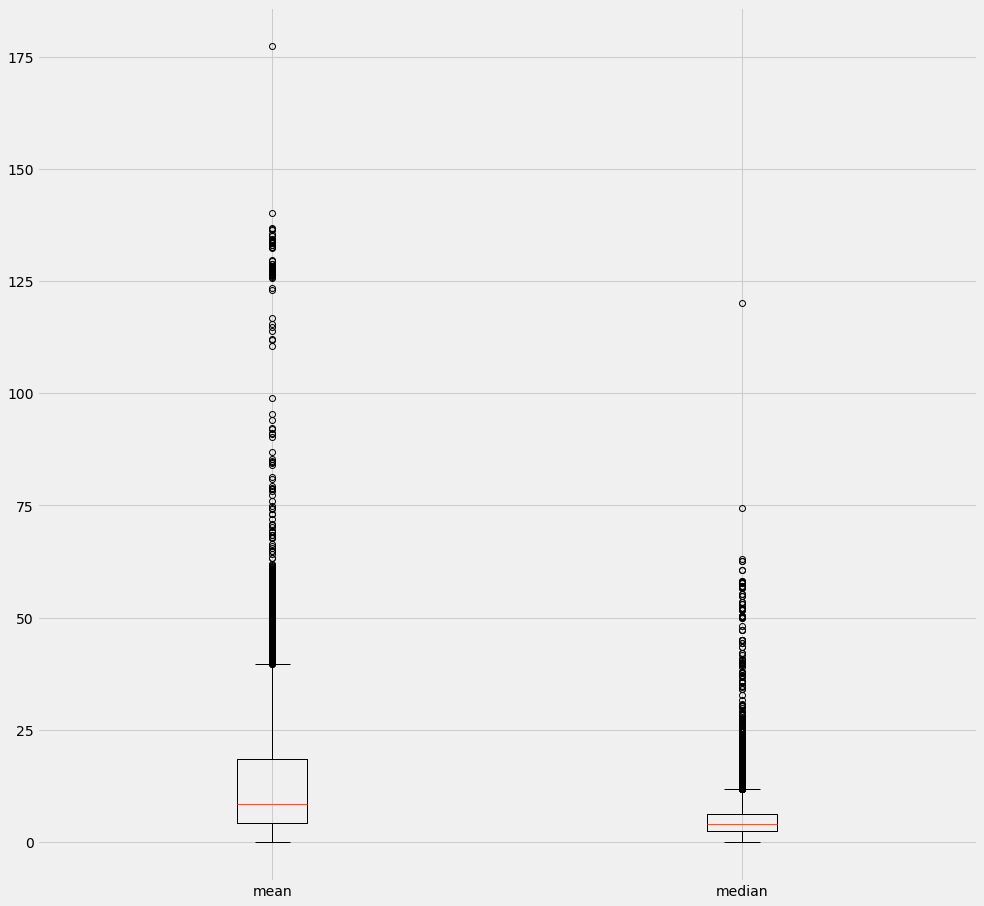

In [20]:
boxplot=boxplot_by_specie('so2')

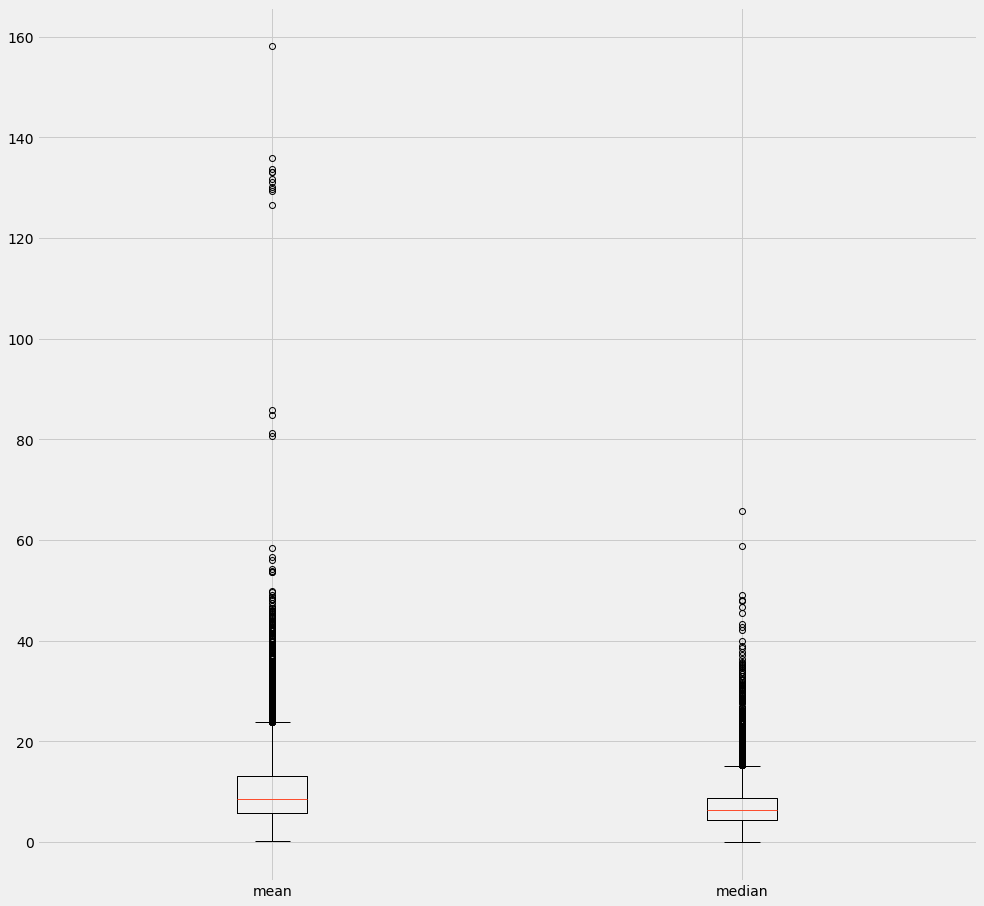

In [21]:
boxplot=boxplot_by_specie('co')

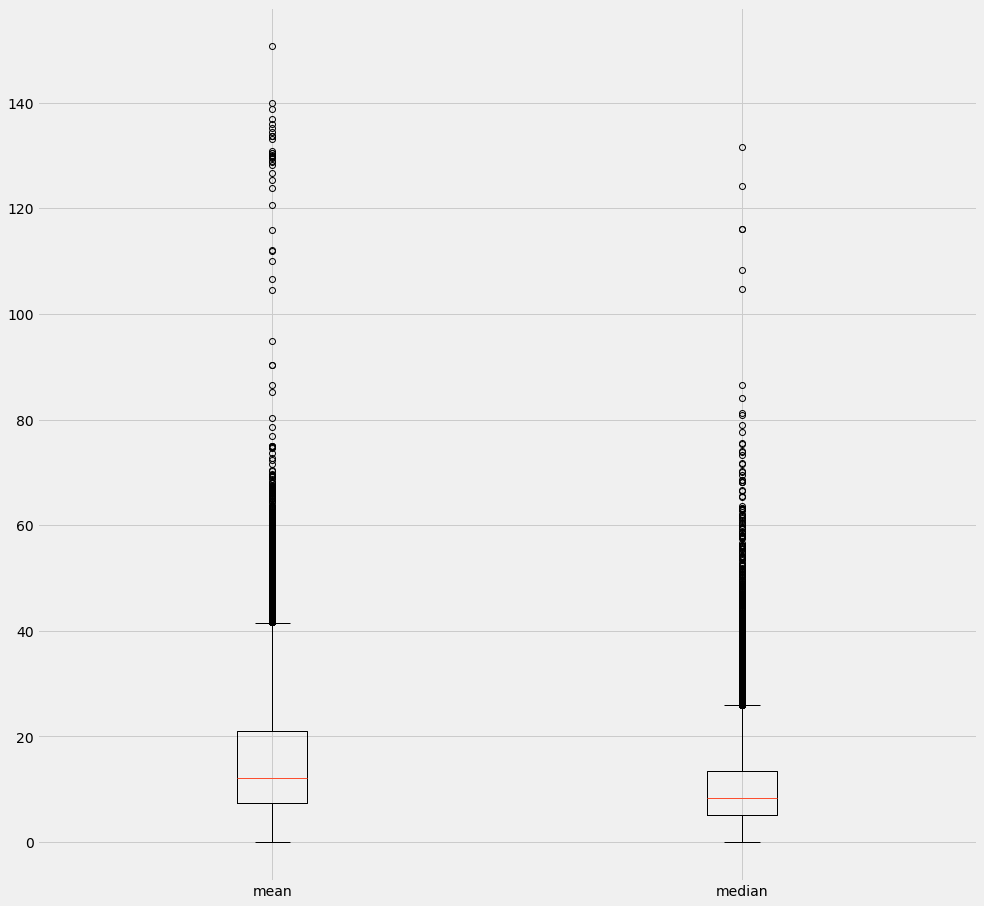

In [22]:
boxplot=boxplot_by_specie('no2')

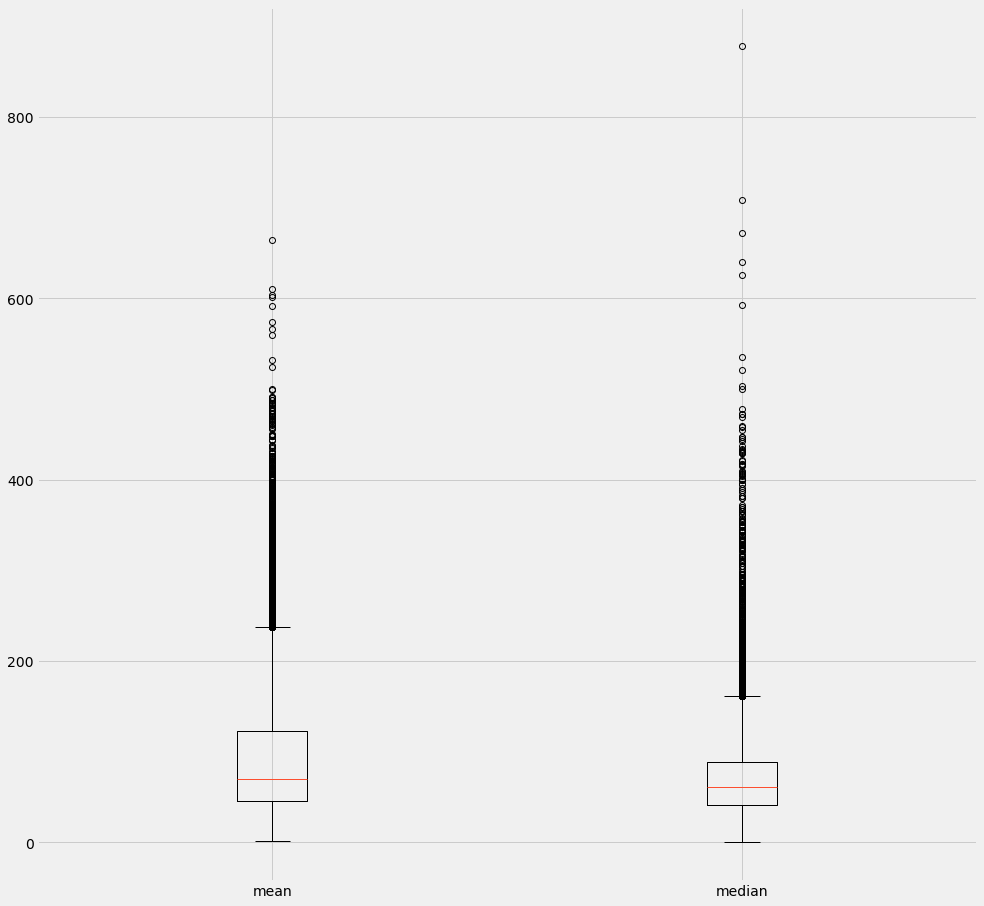

In [23]:
boxplot=boxplot_by_specie('pm10')
boxplot

## Visualization of cities by each species in India

In [24]:
#helper function
def topcity(spec):
    df_Airqualty_india_specie=df_Airqualty_india.groupby('Specie')
    df_Airqualty_india_species=df_Airqualty_india_specie.get_group(spec)
    myspecie=df_Airqualty_india_species.sort_values(by=['mean'],ascending=False)
    #graph of mean against city for selected specie
    plt.figure(figsize = (15,15))
    plt.style.use('fivethirtyeight')
    plt.bar(myspecie['City'],myspecie['mean'],yerr=myspecie['Std'],ecolor='r',capsize=5,color='b')
    #plt.errorbar(a, b, yerr=c, fmt="o", color="r")
    plt.title(f'{spec} by city in india')
    plt.xlabel('Cities')
    plt.ylabel(f'Mean of {spec}')
    plt.xticks(rotation=90) 
    plt.show()
    return plt.show()


In [25]:
#['pm25','o3', 'so2', 'co', 'no2', 'pm10']

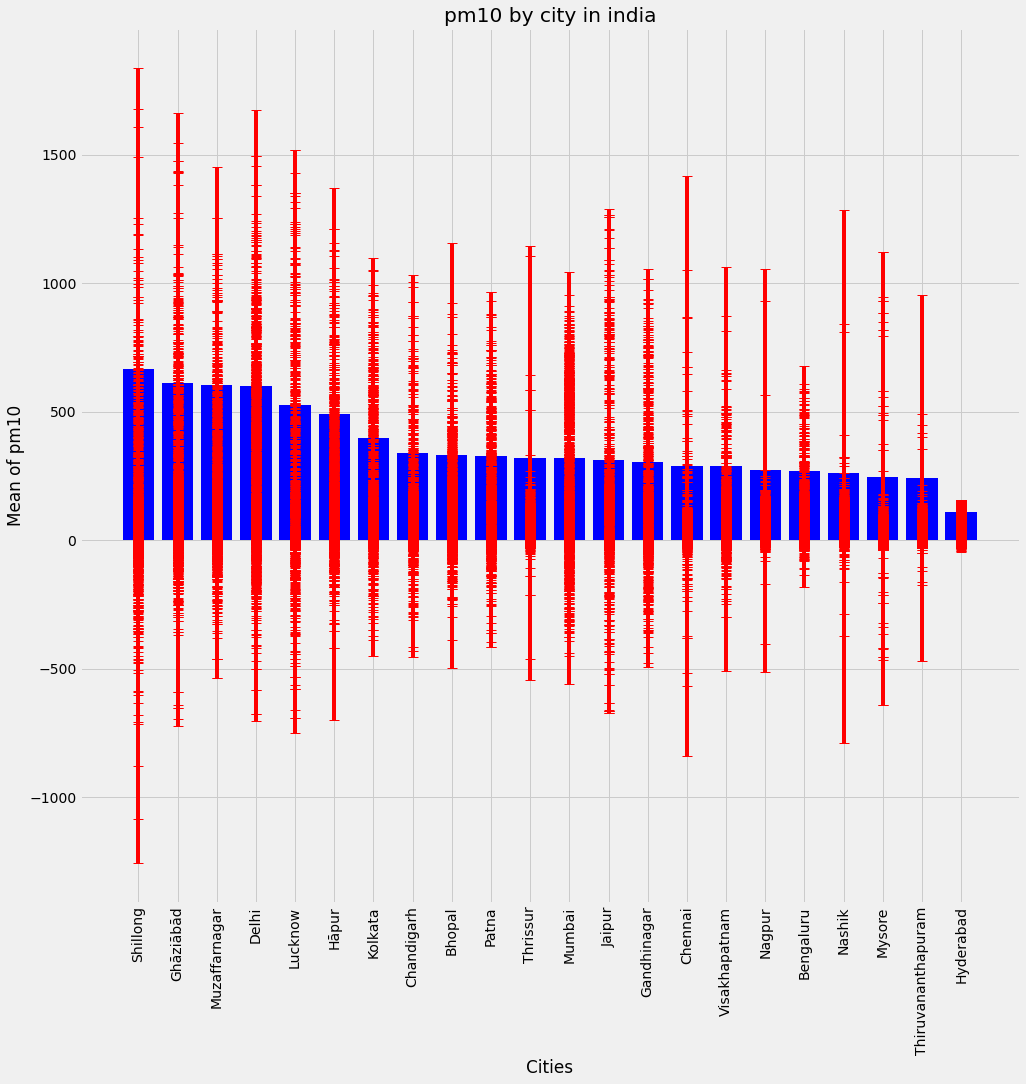

In [26]:
graph=topcity('pm10')
graph

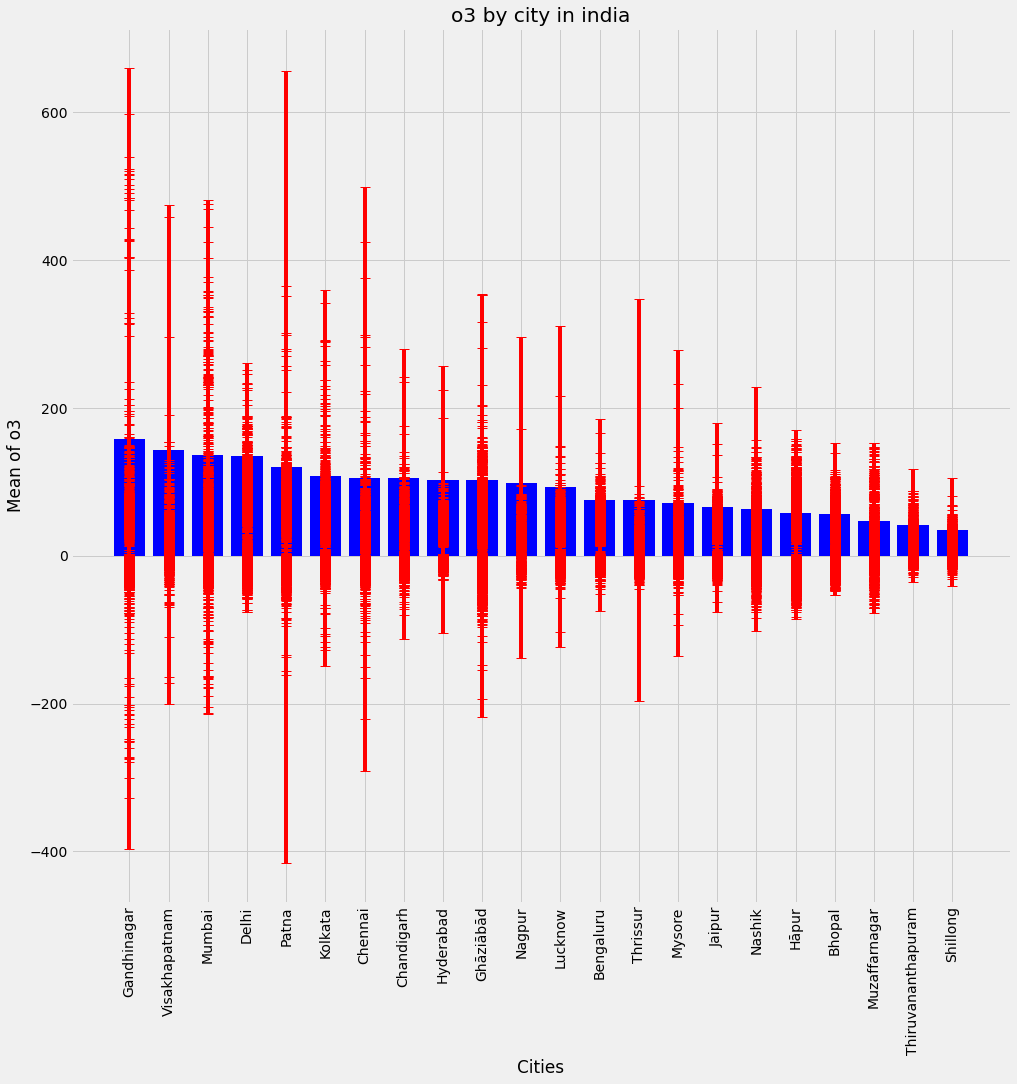

In [27]:
graph=topcity('o3')
graph

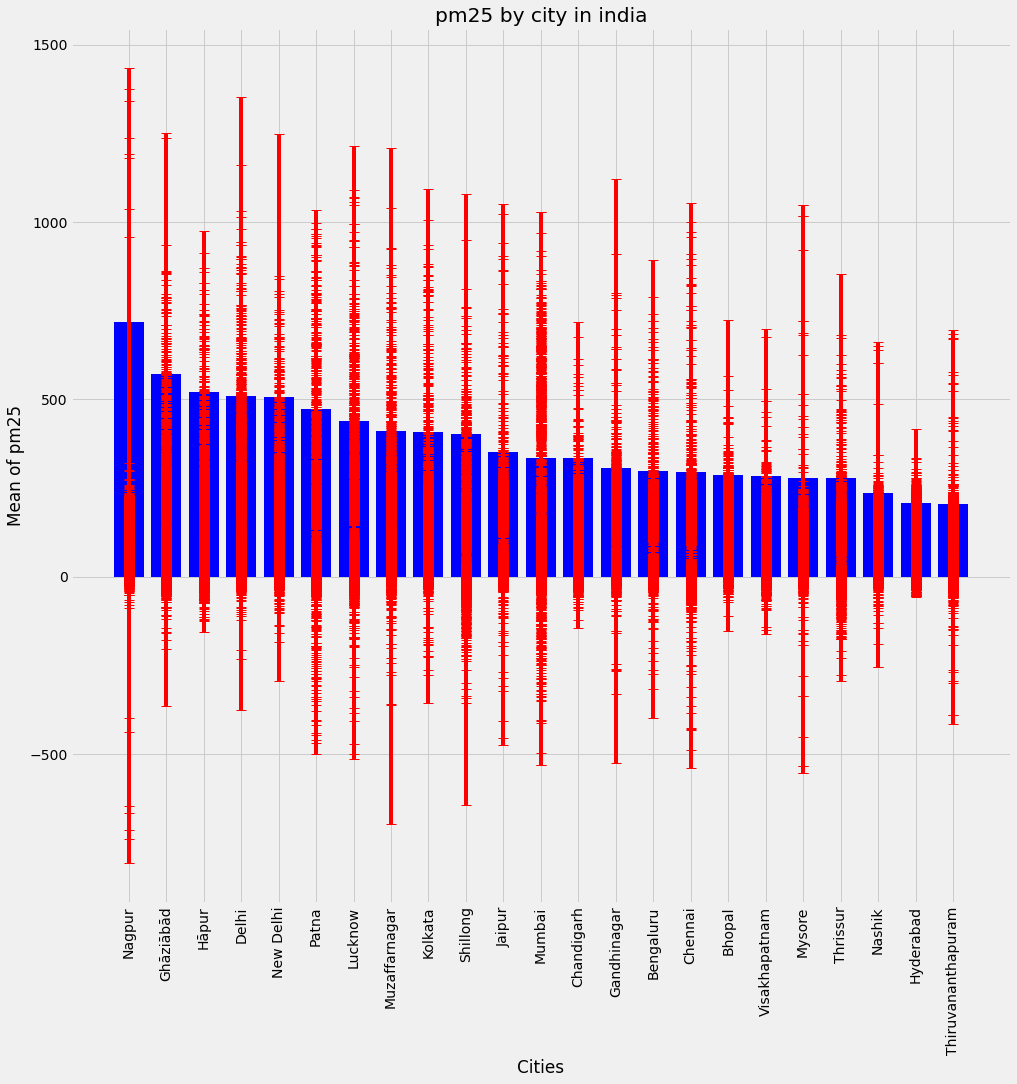

In [28]:
graph=topcity('pm25')
graph

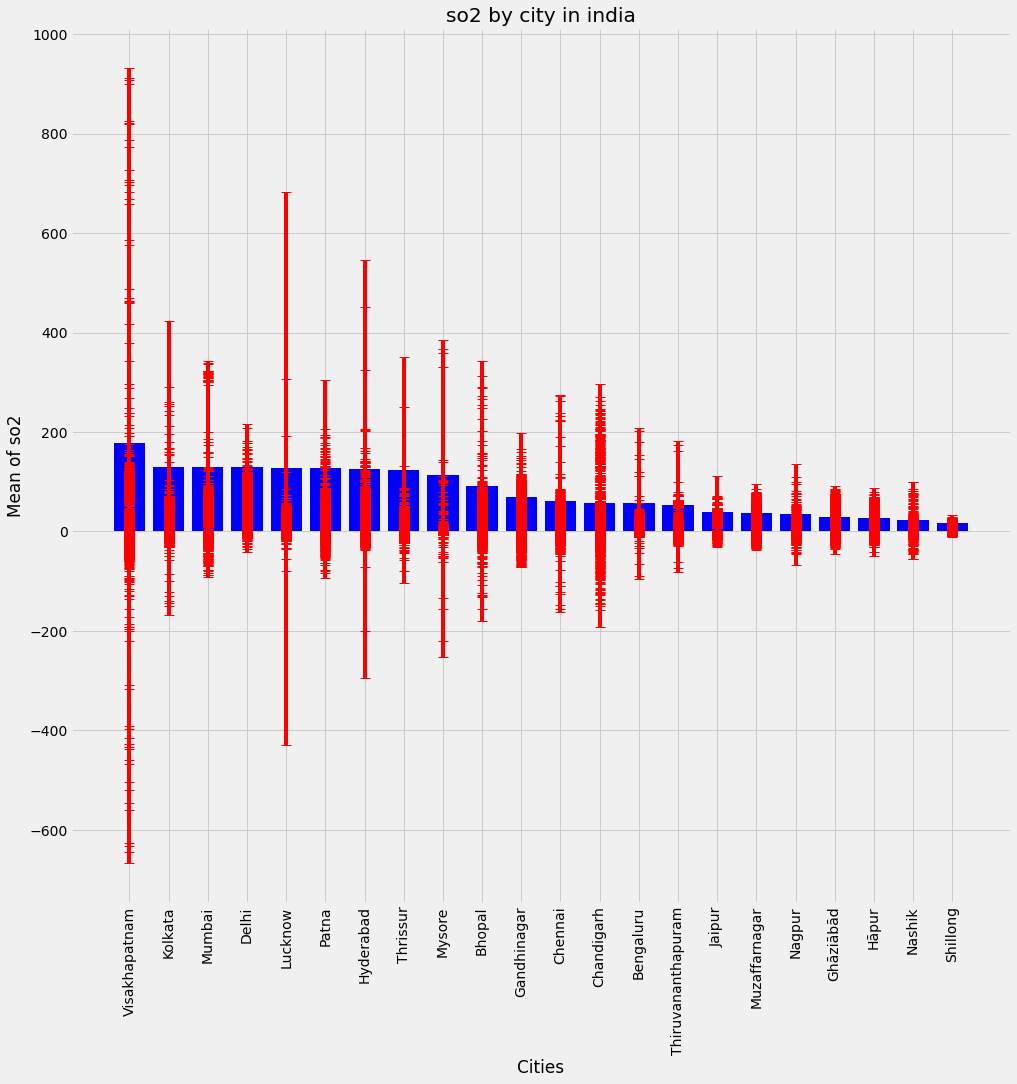

In [29]:
graph=topcity('so2')
graph

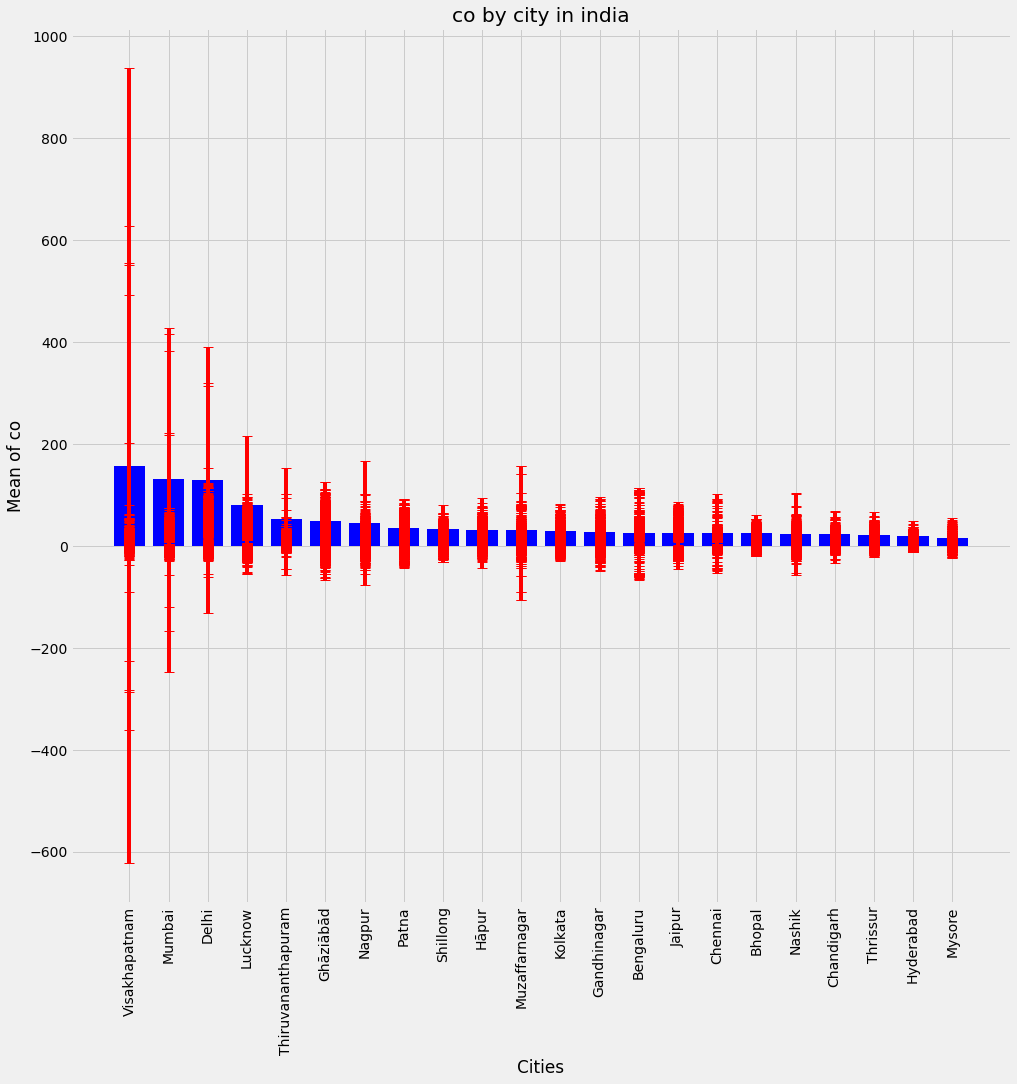

In [30]:
graph=topcity('co')
graph

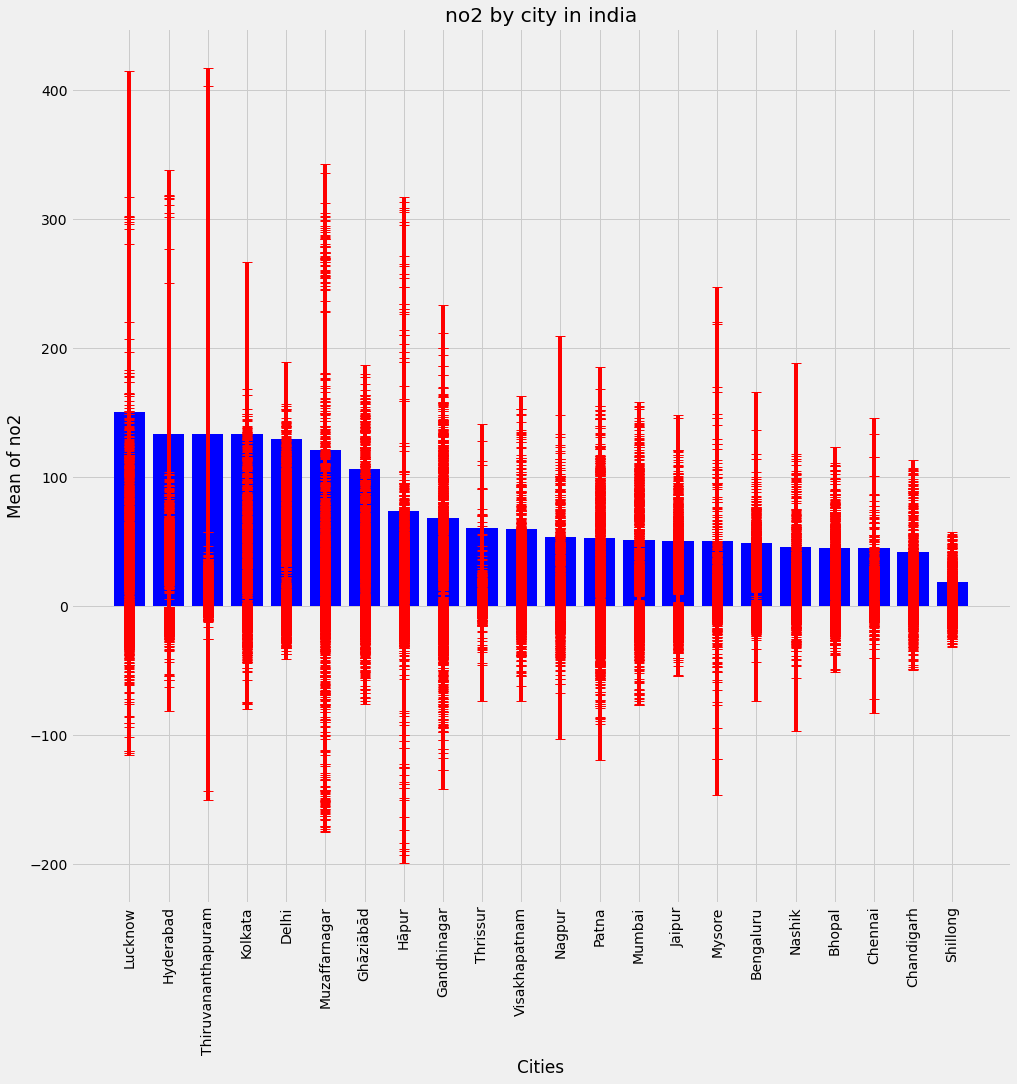

In [31]:
graph=topcity('no2')
graph

##### Time series visualization for top 4 cities in each specie

In [32]:
def top4city(city,spec):
    df_Airqualty_india_specie=df_Airqualty_india.groupby('Specie')
    df_Airqualty_india_species=df_Airqualty_india_specie.get_group(spec)
    myspecie=df_Airqualty_india_species[df_Airqualty_india_species['City']==city]
    #graph of mean against city for selected specie
    plt.figure(figsize = (12,8))
    plt.style.use('fivethirtyeight')
    sns.lineplot(x=myspecie['Date'],y=myspecie['mean'],color='b',label=f'{spec}')
    plt.title(f'Time series of {spec} in {city} city')
    plt.xlabel('dates')
    plt.ylabel(f'Mean of {spec}')
    plt.xticks(rotation=90) 
    plt.show()
    return plt.show()

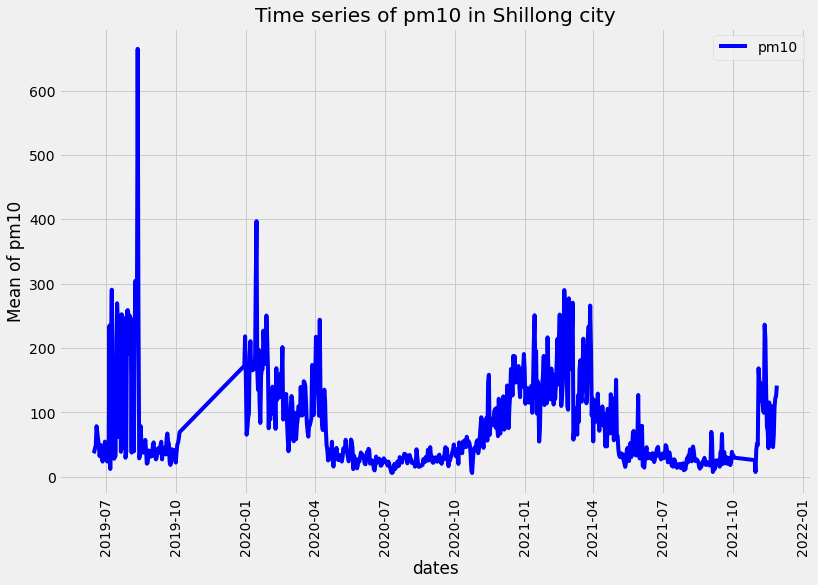

In [33]:
#top1 city in pm10
cities=top4city('Shillong','pm10')

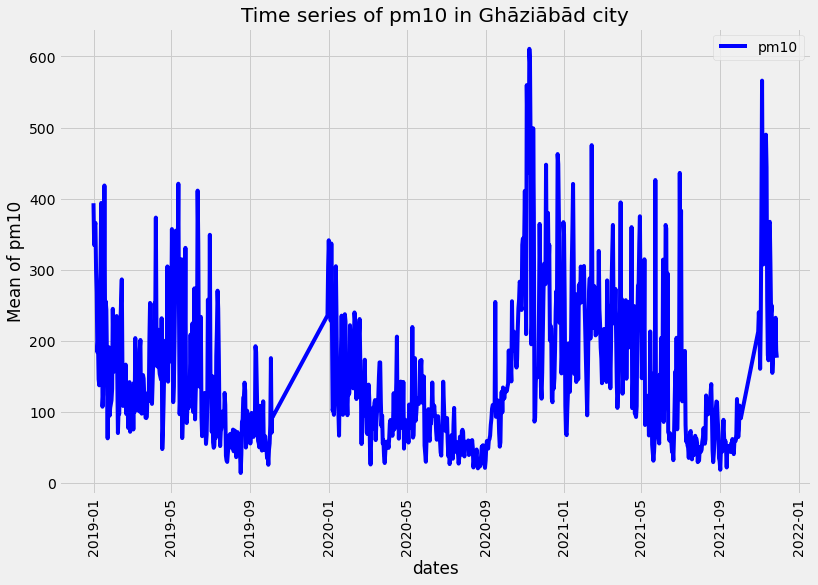

In [34]:
#second city in pm10
cities=top4city('Ghāziābād','pm10')

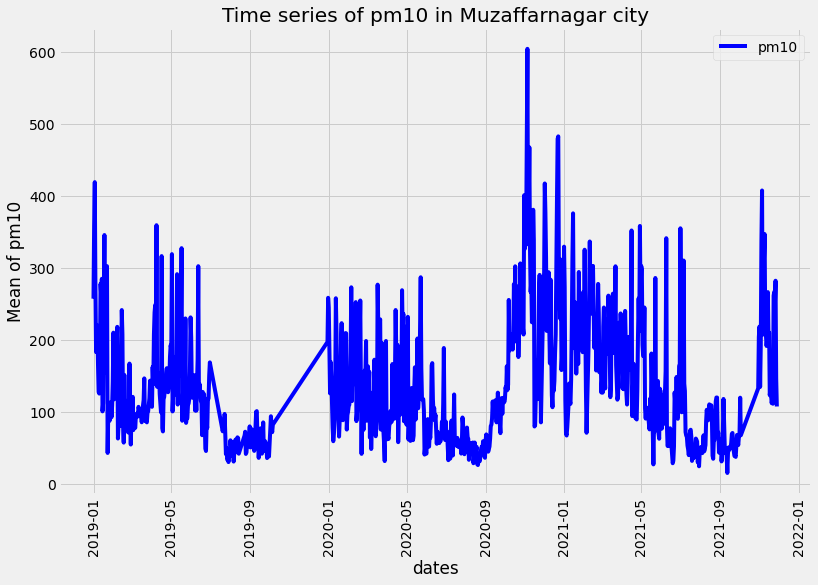

In [35]:
#third city in pm10
cities=top4city('Muzaffarnagar','pm10')

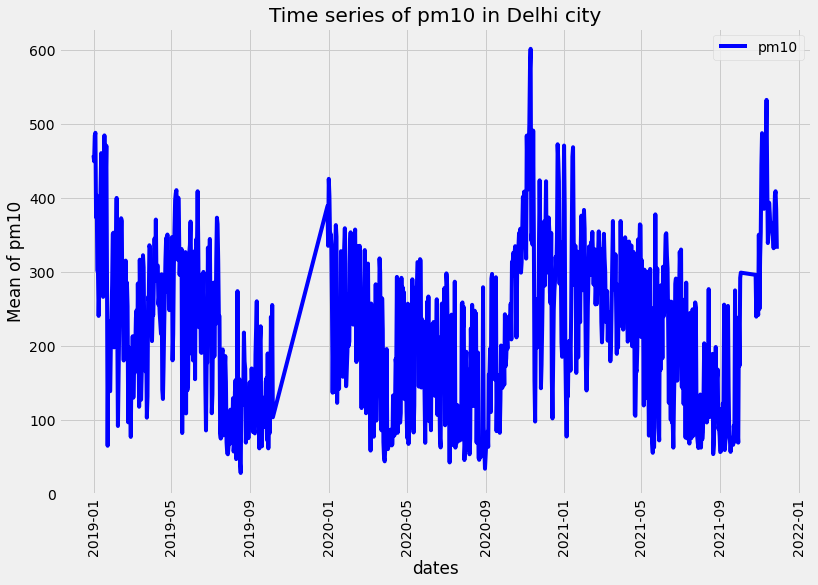

In [36]:
#third city in pm10
cities=top4city('Delhi','pm10')

###### o3

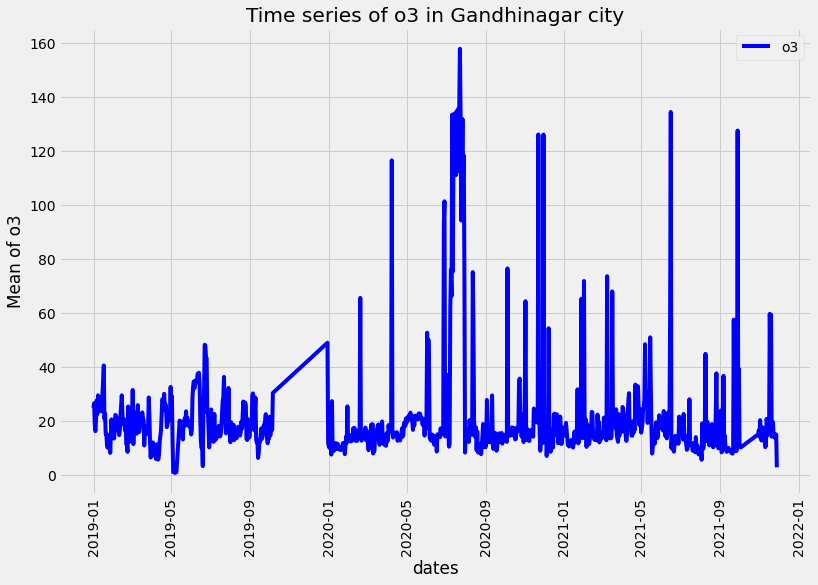

In [37]:
cities=top4city('Gandhinagar','o3')

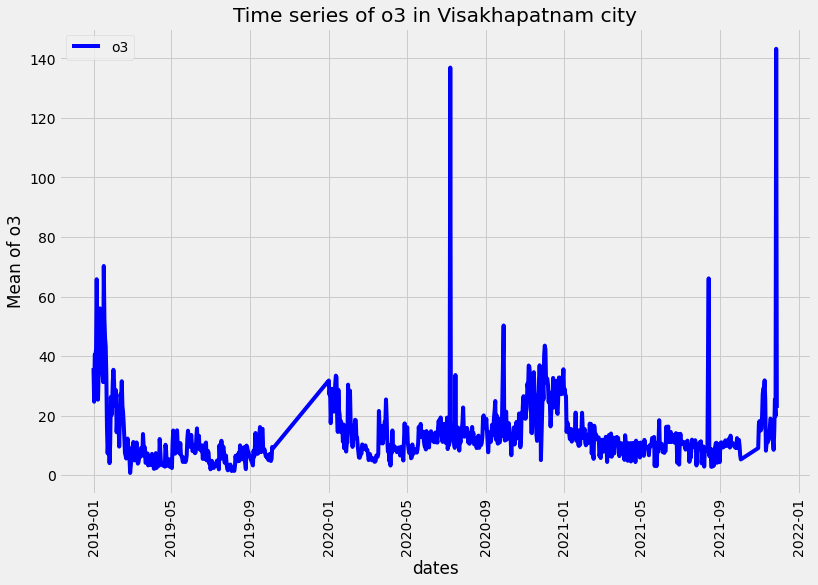

In [38]:
cities=top4city('Visakhapatnam','o3')

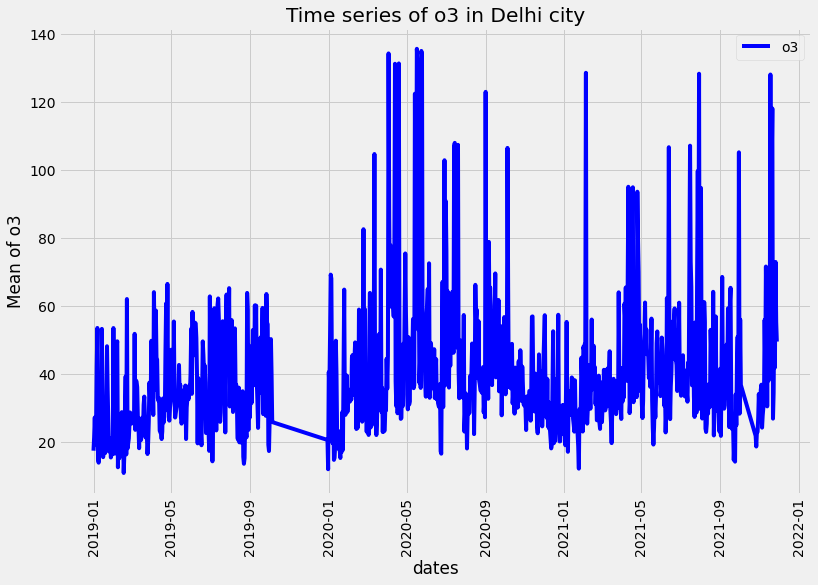

In [39]:
cities=top4city('Delhi','o3')

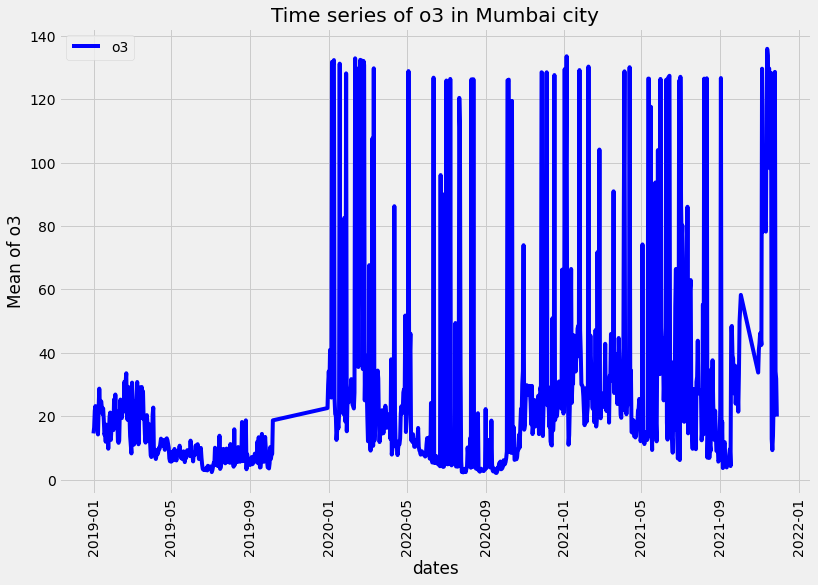

In [40]:
cities=top4city('Mumbai','o3')

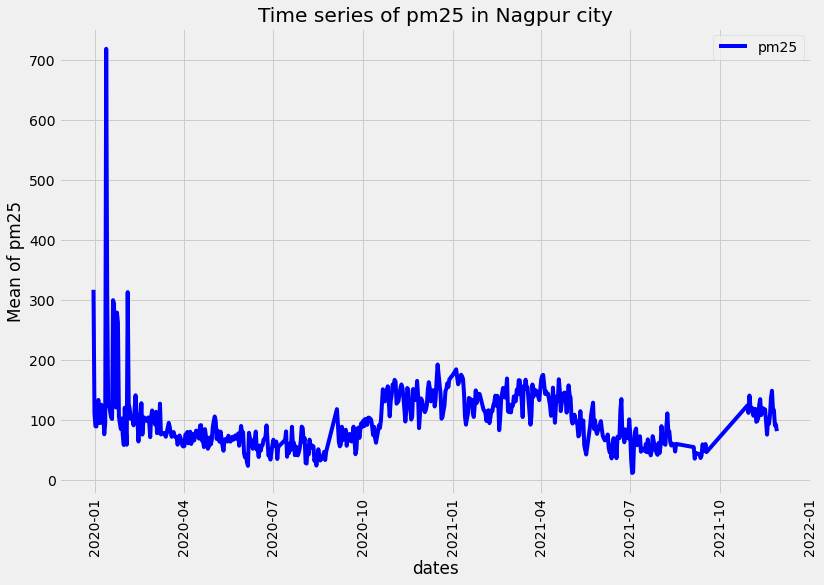

In [41]:
cities=top4city('Nagpur','pm25')

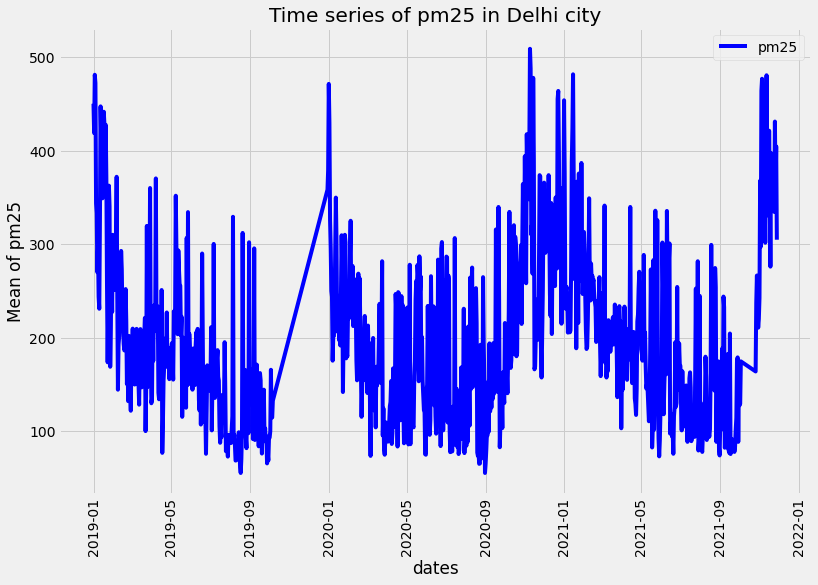

In [42]:
cities=top4city('Delhi','pm25')

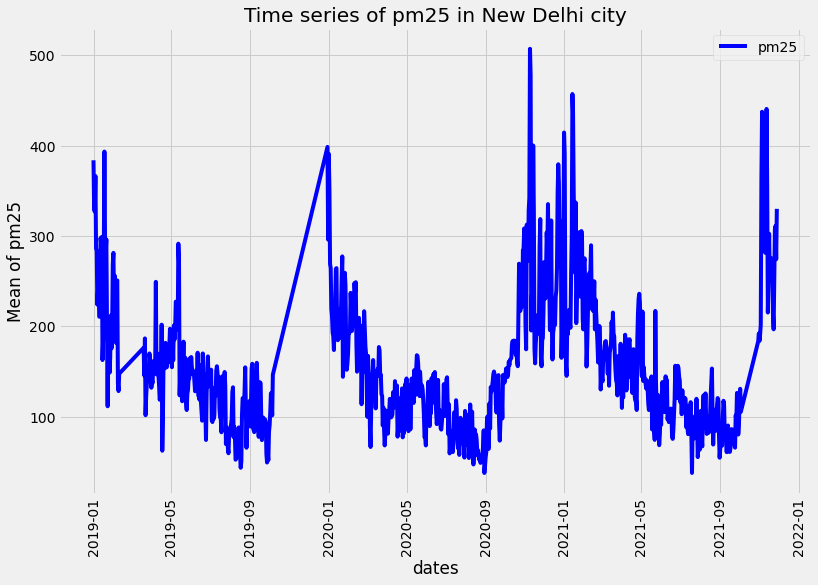

In [43]:
cities=top4city('New Delhi','pm25')

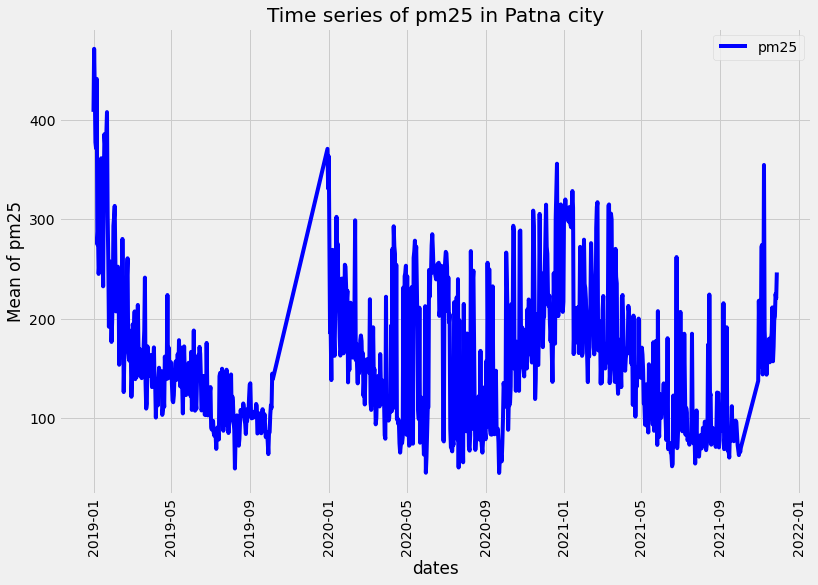

In [44]:
cities=top4city('Patna','pm25')

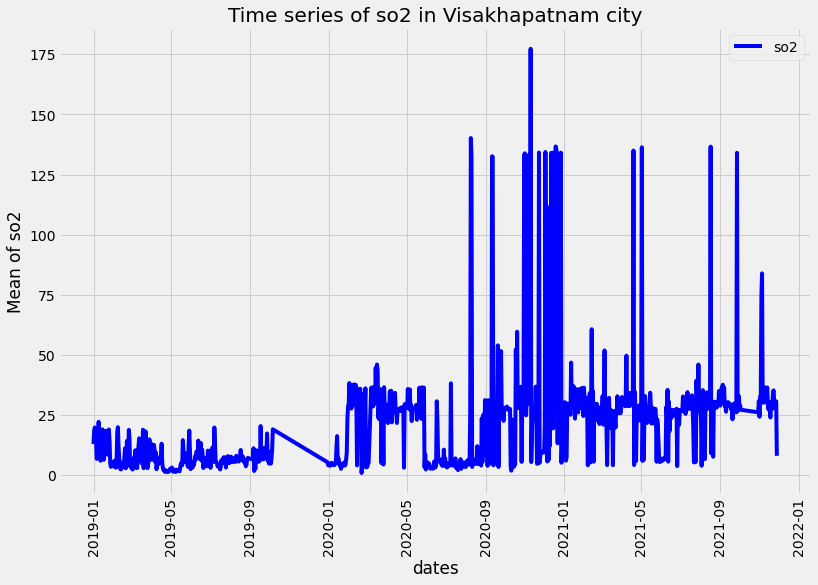

In [45]:
cities=top4city('Visakhapatnam','so2')

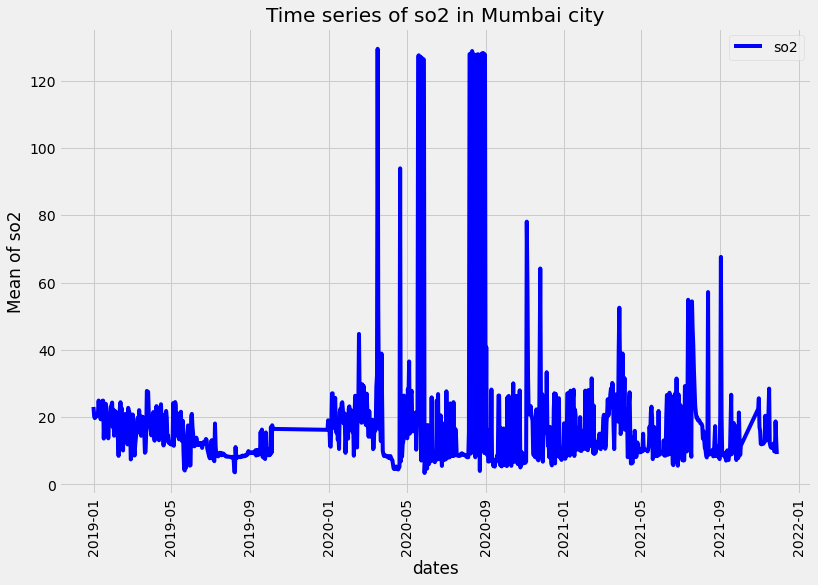

In [46]:
cities=top4city('Mumbai','so2')

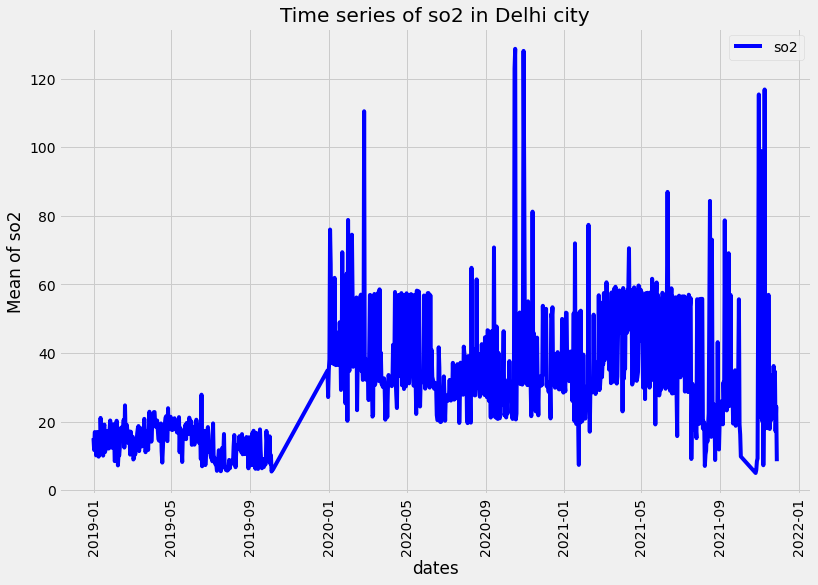

In [47]:
cities=top4city('Delhi','so2')

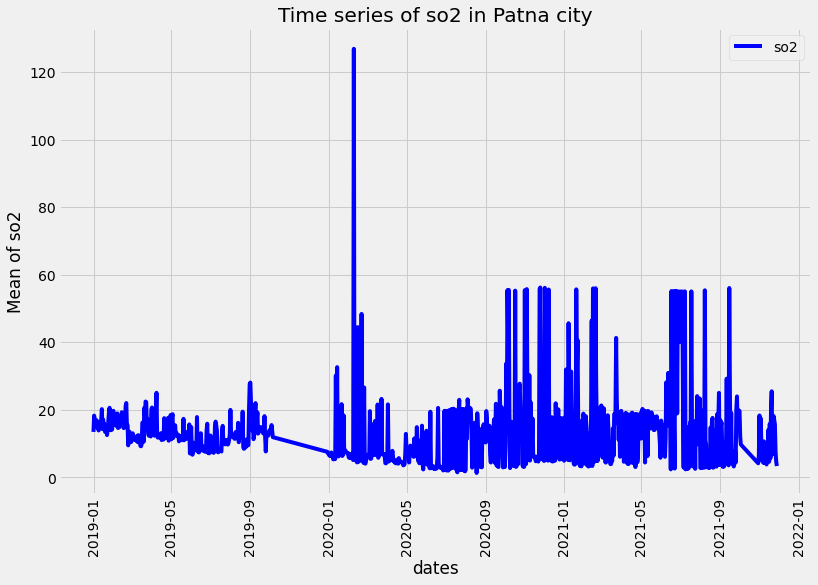

In [48]:
cities=top4city('Patna','so2')

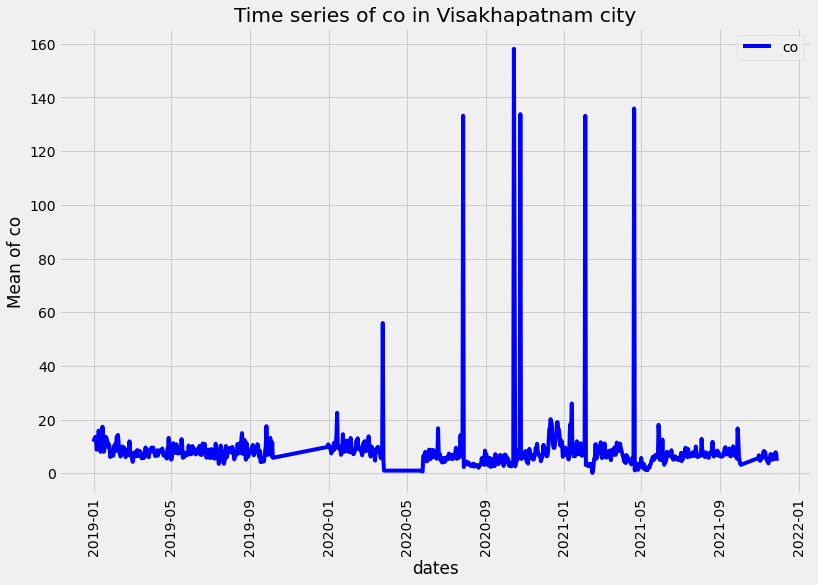

In [49]:
cities=top4city('Visakhapatnam','co')

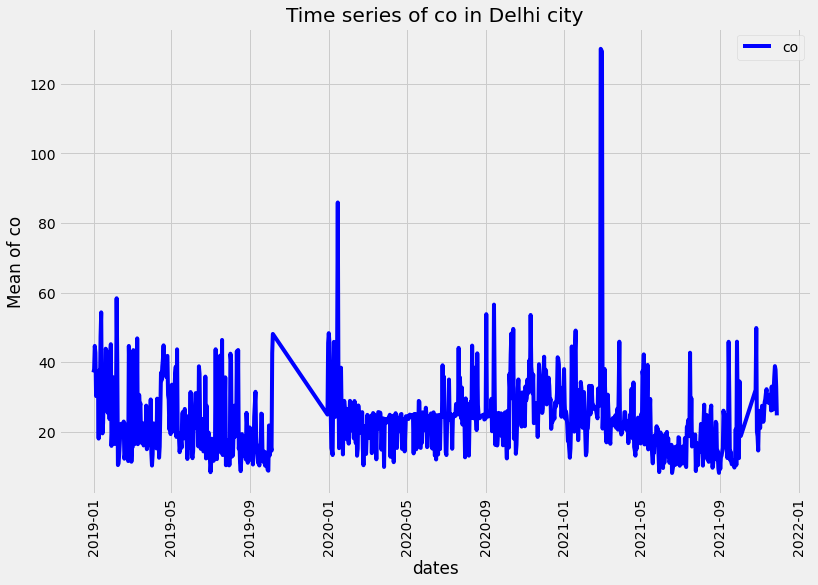

In [50]:
cities=top4city('Delhi','co')

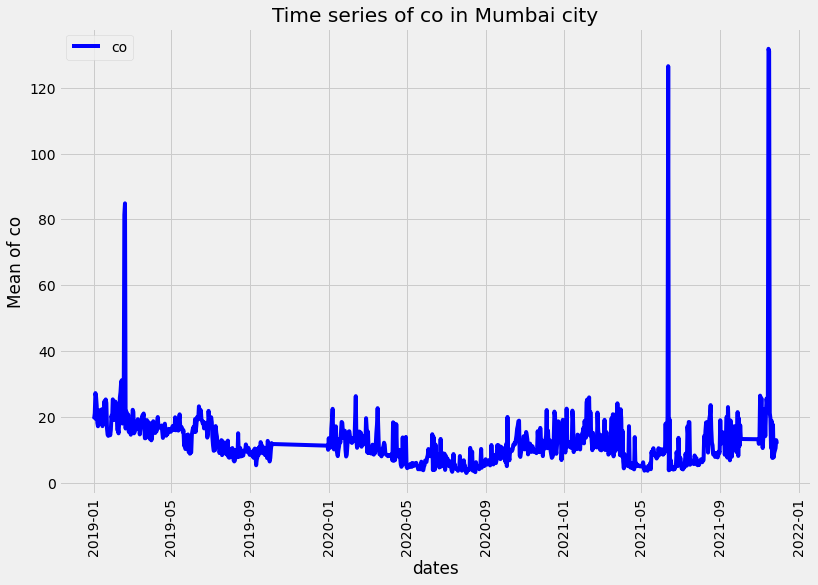

In [51]:
cities=top4city('Mumbai','co')

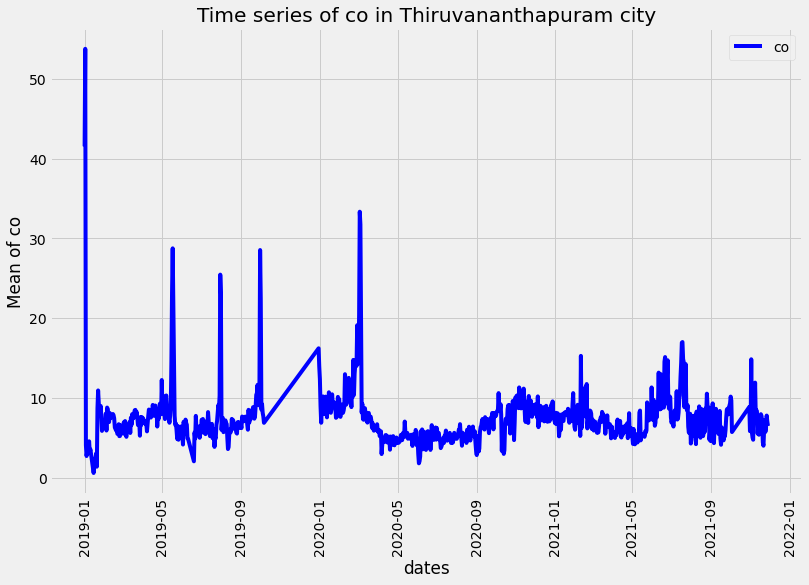

In [52]:
cities=top4city('Thiruvananthapuram','co')

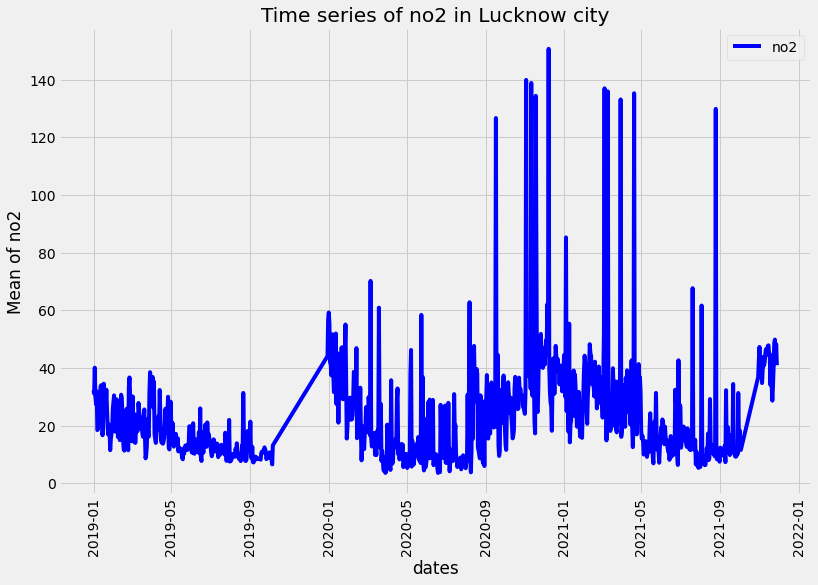

In [53]:
cities=top4city('Lucknow','no2')

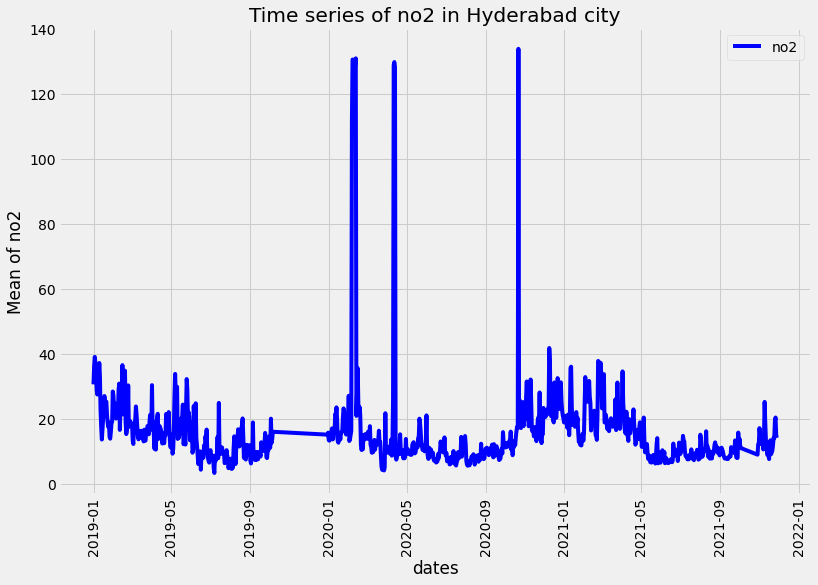

In [54]:
cities=top4city('Hyderabad','no2')

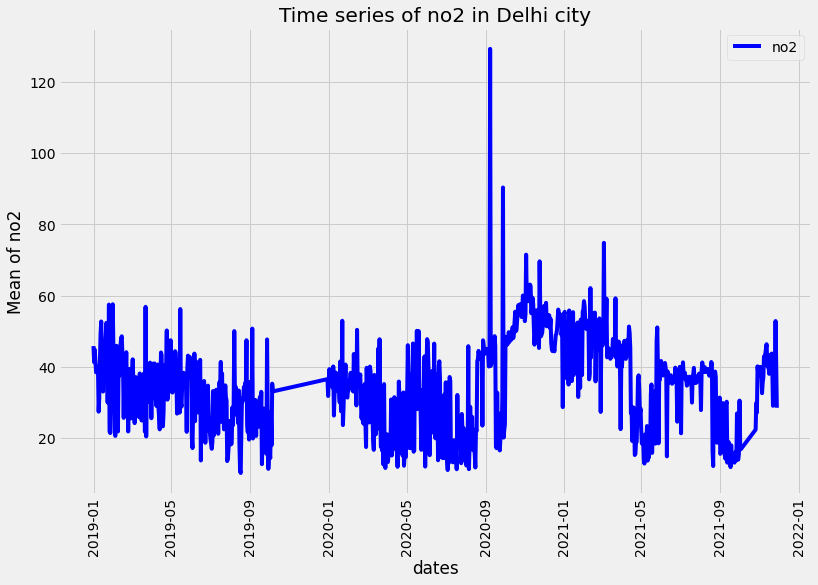

In [55]:
cities=top4city('Delhi','no2')

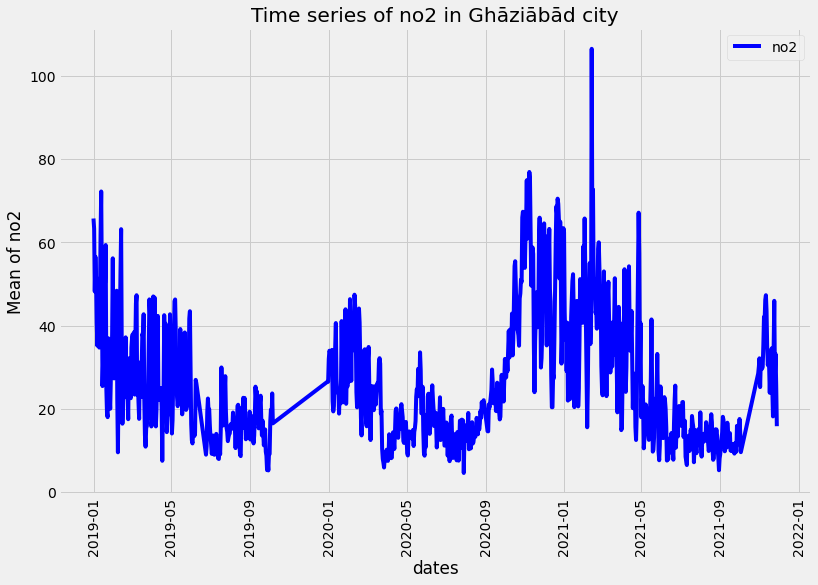

In [56]:
cities=top4city('Ghāziābād','no2')

In [57]:
df_Airqualty_india['City'].unique()

array(['New Delhi', 'Delhi', 'Chandigarh', 'Bhopal', 'Ghāziābād', 'Hāpur',
       'Gandhinagar', 'Chennai', 'Nashik', 'Visakhapatnam', 'Mumbai',
       'Jaipur', 'Patna', 'Muzaffarnagar', 'Thiruvananthapuram',
       'Bengaluru', 'Kolkata', 'Thrissur', 'Hyderabad', 'Lucknow',
       'Shillong', 'Nagpur', 'Mysore'], dtype=object)

### Lockdown_dataset

In [58]:
lockdown_india=lockdown[lockdown['country_territory']=='India'].reset_index(drop=True)
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,third_lockdown_start_date,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,National
1,India,IN,Bengaluru,NaN,NaN,NaN,2021-04-27,2021-05-09,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Region
2,India,IN,Delhi,NaN,NaN,NaN,2021-04-19,2021-05-31,42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,Region
3,India,IN,Haryana,NaN,NaN,NaN,2021-05-03,2021-05-10,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,State
4,India,IN,Maharashtra,NaN,NaN,NaN,2021-04-14,2021-06-15,62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,State
5,India,IN,Odisha,NaN,NaN,NaN,2021-05-05,2021-05-19,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,State
6,India,IN,Rajasthan,NaN,NaN,NaN,2021-05-10,2021-06-08,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,State
7,India,IN,Uttar Pradesh,NaN,NaN,NaN,2021-04-30,2021-05-10,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,State


In [59]:
lockdown_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_territory            8 non-null      object 
 1   country_code                 8 non-null      object 
 2   place                        8 non-null      object 
 3   first_lockdown_start_date    1 non-null      object 
 4   first_lockdown_end_date      1 non-null      object 
 5   first_lockdown_length        1 non-null      object 
 6   second_lockdown_start_date   7 non-null      object 
 7   second_lockdown_end_date     7 non-null      object 
 8   second_lockdown_length       7 non-null      object 
 9   third_lockdown_start_date    0 non-null      object 
 10  third_lockdown_end_date      0 non-null      object 
 11  third_lockdown_length        0 non-null      float64
 12  fourth_lockdown_start_date   0 non-null      object 
 13  fourth_lockdown_end_date

In [60]:
# let drop all column with zero non-null
lockdown_india.drop(['third_lockdown_start_date', 'third_lockdown_end_date',
       'third_lockdown_length', 'fourth_lockdown_start_date',
       'fourth_lockdown_end_date', 'fourth_lockdown_length',
       'fifth_lockdown_start_date', 'fifth_lockdown_end_date',
       'fifth_lockdown_length', 'sixth_lockdown_start_date',
       'sixth_lockdown_end_date', 'sixth_lockdown_length',
       'seventh_lockdown_start_date', 'seventh_lockdown_end_date',
       'seventh_lockdown_length', 'eighth_lockdown_start_date',
       'eighth_lockdown_end_date', 'eighth_lockdown_length'],inplace=True, axis=1)
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaN,NaN,NaN,74,National
1,India,IN,Bengaluru,NaN,NaN,NaN,2021-04-27,2021-05-09,12,12,Region
2,India,IN,Delhi,NaN,NaN,NaN,2021-04-19,2021-05-31,42,42,Region
3,India,IN,Haryana,NaN,NaN,NaN,2021-05-03,2021-05-10,7,7,State
4,India,IN,Maharashtra,NaN,NaN,NaN,2021-04-14,2021-06-15,62,62,State
5,India,IN,Odisha,NaN,NaN,NaN,2021-05-05,2021-05-19,14,14,State
6,India,IN,Rajasthan,NaN,NaN,NaN,2021-05-10,2021-06-08,29,29,State
7,India,IN,Uttar Pradesh,NaN,NaN,NaN,2021-04-30,2021-05-10,10,10,State


In [61]:
lockdown_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   country_territory           8 non-null      object
 1   country_code                8 non-null      object
 2   place                       8 non-null      object
 3   first_lockdown_start_date   1 non-null      object
 4   first_lockdown_end_date     1 non-null      object
 5   first_lockdown_length       1 non-null      object
 6   second_lockdown_start_date  7 non-null      object
 7   second_lockdown_end_date    7 non-null      object
 8   second_lockdown_length      7 non-null      object
 9   total_length                8 non-null      object
 10  level                       8 non-null      object
dtypes: object(11)
memory usage: 832.0+ bytes


In [62]:
#converting date to dateformat
#df_2019_2020_lockdown_india['Date'] = pd.to_datetime(df_2019_2020_lockdown_india['Date'])
lockdown_india['first_lockdown_start_date'] = pd.to_datetime(lockdown_india['first_lockdown_start_date'])
lockdown_india['first_lockdown_end_date'] = pd.to_datetime(lockdown_india['first_lockdown_end_date'])
lockdown_india['second_lockdown_start_date'] = pd.to_datetime(lockdown_india['second_lockdown_start_date'])
lockdown_india['second_lockdown_end_date'] = pd.to_datetime(lockdown_india['second_lockdown_end_date'])
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaT,NaT,NaN,74,National
1,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12,12,Region
2,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42,42,Region
3,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7,7,State
4,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62,62,State
5,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14,14,State
6,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29,29,State
7,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10,10,State


In [63]:
# converting lockdown length to float
lockdown_india['first_lockdown_length']=lockdown_india['first_lockdown_length'].astype(float)
lockdown_india['second_lockdown_length']=lockdown_india['second_lockdown_length'].astype(float)
lockdown_india['total_length']=lockdown_india['total_length'].astype(float)


In [64]:
lockdown_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country_territory           8 non-null      object        
 1   country_code                8 non-null      object        
 2   place                       8 non-null      object        
 3   first_lockdown_start_date   1 non-null      datetime64[ns]
 4   first_lockdown_end_date     1 non-null      datetime64[ns]
 5   first_lockdown_length       1 non-null      float64       
 6   second_lockdown_start_date  7 non-null      datetime64[ns]
 7   second_lockdown_end_date    7 non-null      datetime64[ns]
 8   second_lockdown_length      7 non-null      float64       
 9   total_length                8 non-null      float64       
 10  level                       8 non-null      object        
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 832.

In [65]:
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74.0,NaT,NaT,NaN,74.0,National
1,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12.0,12.0,Region
2,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42.0,42.0,Region
3,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7.0,7.0,State
4,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62.0,62.0,State
5,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14.0,14.0,State
6,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29.0,29.0,State
7,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10.0,10.0,State


###### making species columns

In [66]:
df_Airqualty_india

,Date,country_code,City,Specie,count,min,max,median,variance,mean,Std
0,2019-01-25,IN,New Delhi,temperature,24,8.1,16.5,10.9,70.07,11.629167,8.370783
1,2019-03-15,IN,New Delhi,temperature,24,11.2,23.3,15.5,199.22,16.411458,14.114532
2,2019-01-05,IN,New Delhi,temperature,24,7.6,15.3,10.8,82.07,11.138542,9.059249
3,2019-01-19,IN,New Delhi,temperature,24,8.0,20.1,10.7,194.17,12.444792,13.934490
4,2019-03-21,IN,New Delhi,temperature,24,15.6,28.5,19.3,219.36,20.732292,14.810807
...,...,...,...,...,...,...,...,...,...,...,...
248619,2021-09-12,IN,Kolkata,co,190,0.2,10.0,3.6,63.14,4.350000,7.946068
248620,2021-11-23,IN,Kolkata,co,204,1.6,30.2,9.1,246.45,12.500000,15.698726
248621,2021-01-11,IN,Kolkata,co,224,0.6,47.2,7.1,324.98,15.500000,18.027202
248622,2021-06-21,IN,Kolkata,co,239,0.4,29.2,4.8,166.80,9.800000,12.915107


In [67]:
df_Airqualty_india.columns

Index(['Date', 'country_code', 'City', 'Specie', 'count', 'min', 'max',
       'median', 'variance', 'mean', 'Std'],
      dtype='object')

In [68]:
df_Airqualty_india_new=df_Airqualty_india[['Date', 'country_code', 'City', 'Specie', 'mean']]

In [69]:
df_Airqualty_india_new

,Date,country_code,City,Specie,mean
0,2019-01-25,IN,New Delhi,temperature,11.629167
1,2019-03-15,IN,New Delhi,temperature,16.411458
2,2019-01-05,IN,New Delhi,temperature,11.138542
3,2019-01-19,IN,New Delhi,temperature,12.444792
4,2019-03-21,IN,New Delhi,temperature,20.732292
...,...,...,...,...,...
248619,2021-09-12,IN,Kolkata,co,4.350000
248620,2021-11-23,IN,Kolkata,co,12.500000
248621,2021-01-11,IN,Kolkata,co,15.500000
248622,2021-06-21,IN,Kolkata,co,9.800000


In [70]:
table = pd.pivot_table(df_Airqualty_india_new, values='mean', index=['Date'],
                    columns=['Specie'])

In [71]:
table

Specie,co,dew,humidity,no2,o3,pm10,pm25,precipitation,pressure,so2,temperature,wd,wind gust,wind speed,wind-gust,wind-speed
Date,,,,,,,,,,,,,,,,
2018-12-31,17.835926,7.912105,54.878646,30.350157,22.190798,193.529647,250.134320,-148.105263,1012.069917,13.186394,23.180181,205.750,NaN,NaN,9.335417,1.495544
2019-01-01,19.325919,8.301114,57.810251,31.396862,21.638907,207.191952,263.787376,187.309375,1010.671089,13.708485,23.220131,193.575,NaN,NaN,9.200000,1.631154
2019-01-02,17.086748,9.659149,58.672204,31.957523,21.457002,220.919872,253.207165,239.257812,1009.857775,12.940383,23.561842,173.275,NaN,NaN,8.200000,1.113252
2019-01-03,16.309120,9.645955,59.597204,30.154909,21.439854,214.220840,253.555850,-571.187500,1011.559827,13.715534,23.475822,205.850,NaN,NaN,9.700000,1.315683
2019-01-04,13.888484,10.166876,60.578728,28.419578,20.672884,173.483173,223.106360,185.173333,1011.546707,12.421296,23.460855,193.250,NaN,NaN,9.200000,1.209201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,12.514226,16.280265,75.482473,22.971780,24.218655,142.119318,166.889946,NaN,859.535065,18.430161,43.353668,159.700,NaN,NaN,9.025000,1.894550
2021-11-25,13.691619,16.328801,95.591757,22.226278,23.298153,132.840909,177.521286,NaN,858.579778,14.849290,50.940164,155.450,NaN,NaN,13.750000,1.908016
2021-11-26,13.955114,15.899596,69.406884,22.366146,23.971181,152.351326,187.469656,NaN,856.185108,14.207365,48.639260,163.000,NaN,NaN,9.000000,2.092754


In [72]:
table.columns

Index(['co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25', 'precipitation',
       'pressure', 'so2', 'temperature', 'wd', 'wind gust', 'wind speed',
       'wind-gust', 'wind-speed'],
      dtype='object', name='Specie')

In [73]:
table.drop(columns=['dew', 'humidity', 'precipitation',
       'pressure', 'temperature', 'wd', 'wind gust', 'wind speed',
       'wind-gust', 'wind-speed'],inplace=True)

In [74]:
table.isna().sum()

Specie
co      0
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64

In [75]:
table.head()

Specie,co,no2,o3,pm10,pm25,so2
Date,,,,,,
2018-12-31,17.835926,30.350157,22.190798,193.529647,250.134320,13.186394
2019-01-01,19.325919,31.396862,21.638907,207.191952,263.787376,13.708485
2019-01-02,17.086748,31.957523,21.457002,220.919872,253.207165,12.940383
2019-01-03,16.309120,30.154909,21.439854,214.220840,253.555850,13.715534
2019-01-04,13.888484,28.419578,20.672884,173.483173,223.106360,12.421296


In [76]:
table.tail()

Specie,co,no2,o3,pm10,pm25,so2
Date,,,,,,
2021-11-24,12.514226,22.971780,24.218655,142.119318,166.889946,18.430161
2021-11-25,13.691619,22.226278,23.298153,132.840909,177.521286,14.849290
2021-11-26,13.955114,22.366146,23.971181,152.351326,187.469656,14.207365
2021-11-27,13.355061,20.299432,28.494108,156.183239,186.510417,14.813021
2021-11-28,10.742325,15.535093,14.547120,134.240131,178.686407,7.502119


###### Correlation between species

In [77]:
correlation=table.corr()
correlation

Specie,co,no2,o3,pm10,pm25,so2
Specie,,,,,,
co,1.000000,0.704972,0.170612,0.712467,0.709688,0.059483
no2,0.704972,1.000000,0.296940,0.854214,0.888791,0.272169
o3,0.170612,0.296940,1.000000,0.371239,0.331212,0.311448
pm10,0.712467,0.854214,0.371239,1.000000,0.921630,0.284197
pm25,0.709688,0.888791,0.331212,0.921630,1.000000,0.292667
so2,0.059483,0.272169,0.311448,0.284197,0.292667,1.000000


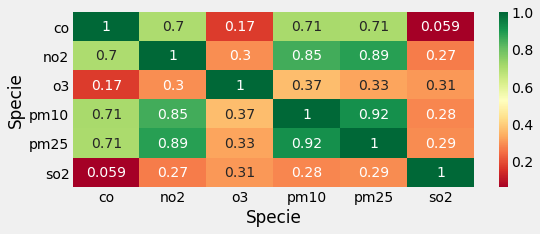

In [78]:
plt.figure(figsize = (8,3))
plt.style.use('fivethirtyeight')
heat_map = sns.heatmap(correlation,annot=True,cmap="RdYlGn",)
plt.show()

In [79]:
def top4city(city,spec):
    df_Airqualty_india_specie=df_Airqualty_india.groupby('Specie')
    df_Airqualty_india_species=df_Airqualty_india_specie.get_group(spec)
    myspecie=df_Airqualty_india_species[df_Airqualty_india_species['City']==city]
    #graph of mean against city for selected specie
    plt.figure(figsize = (12,8))
    plt.style.use('fivethirtyeight')
    sns.lineplot(x=myspecie['Date'],y=myspecie['mean'],color='b',label=f'{spec}')
    plt.title(f'Time series of {spec} in {city} city')
    plt.xlabel('dates')
    plt.ylabel(f'Mean of {spec}')
    plt.xticks(rotation=90) 
    plt.show()
    return plt.show()

###### Time series analysis for each specie

In [80]:
def specieSerie(spec):
    plt.figure(figsize = (15,8))
    sns.lineplot(x=table.index,y=table[spec],label=f'{spec}')
    #plt.vlines(x=(), ymin=0, ymax=, linewidth=2, color='g',linestyle='dashed')
    plt.title(f'Time series of {spec} in India')
    plt.xlabel('dates')
    plt.ylabel(f'{spec}')
    plt.xticks(rotation=90) 
    plt.show()
    return plt.show()

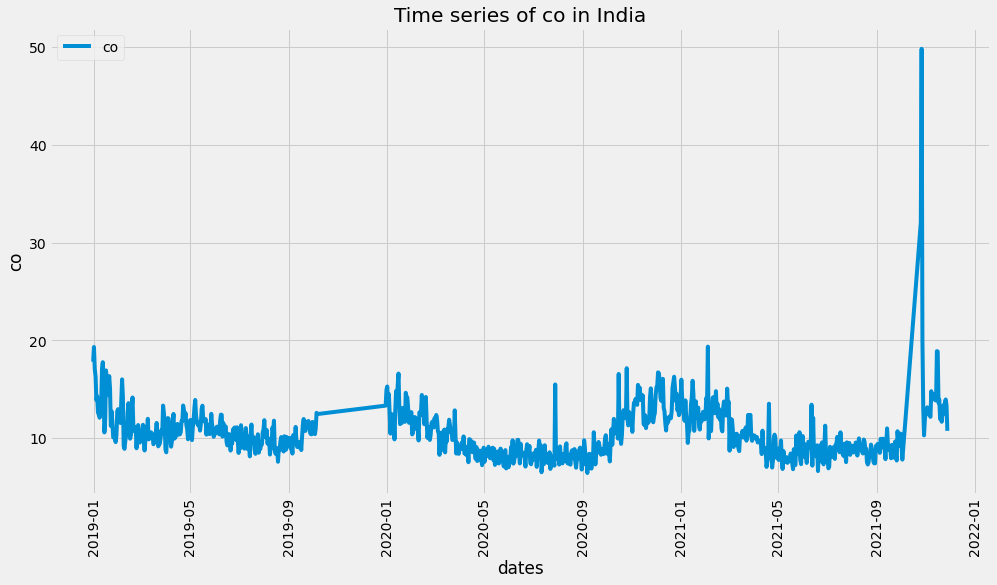

In [81]:
Species=specieSerie('co')

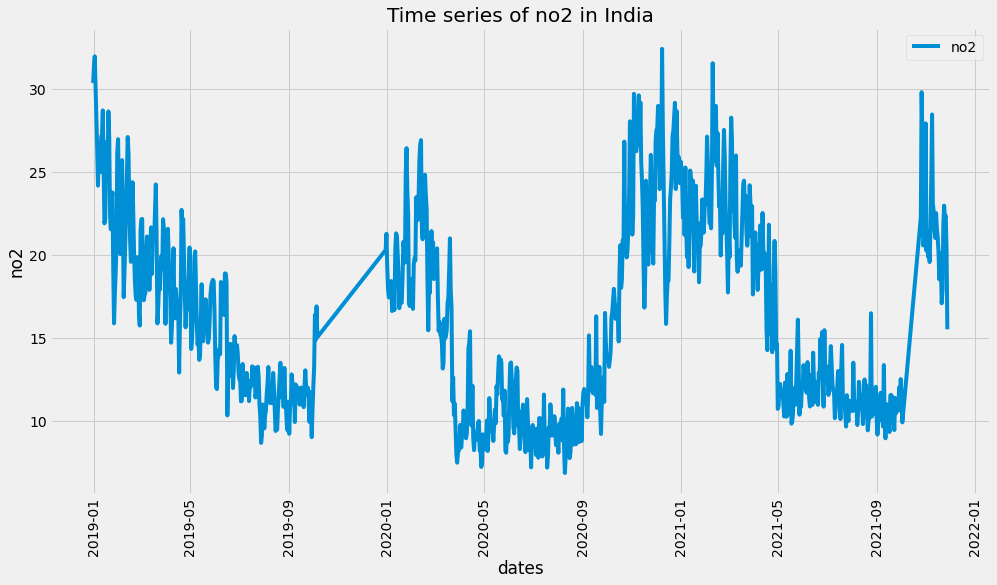

In [82]:
Species=specieSerie('no2')

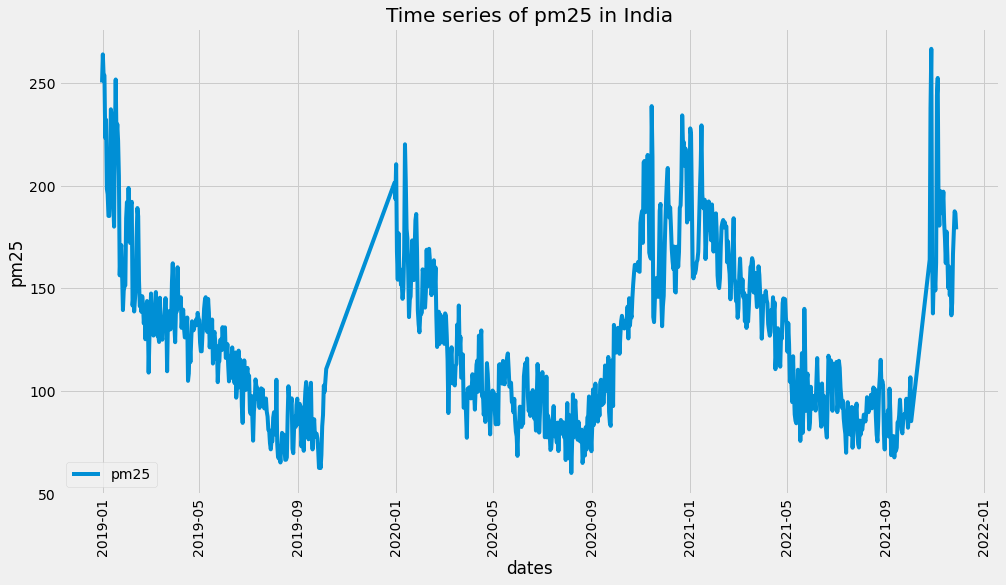

In [83]:
Species=specieSerie('pm25')

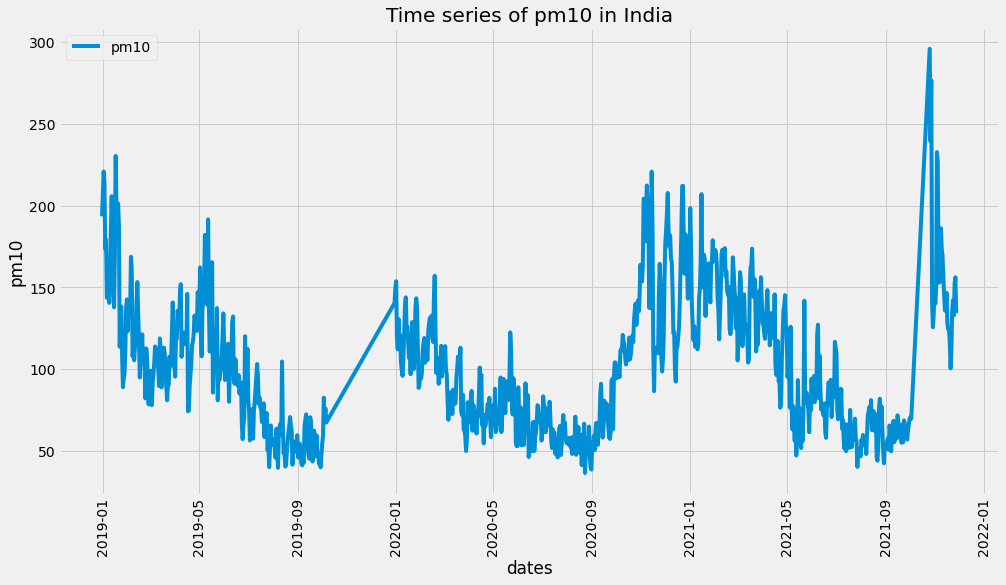

In [84]:
Species=specieSerie('pm10')

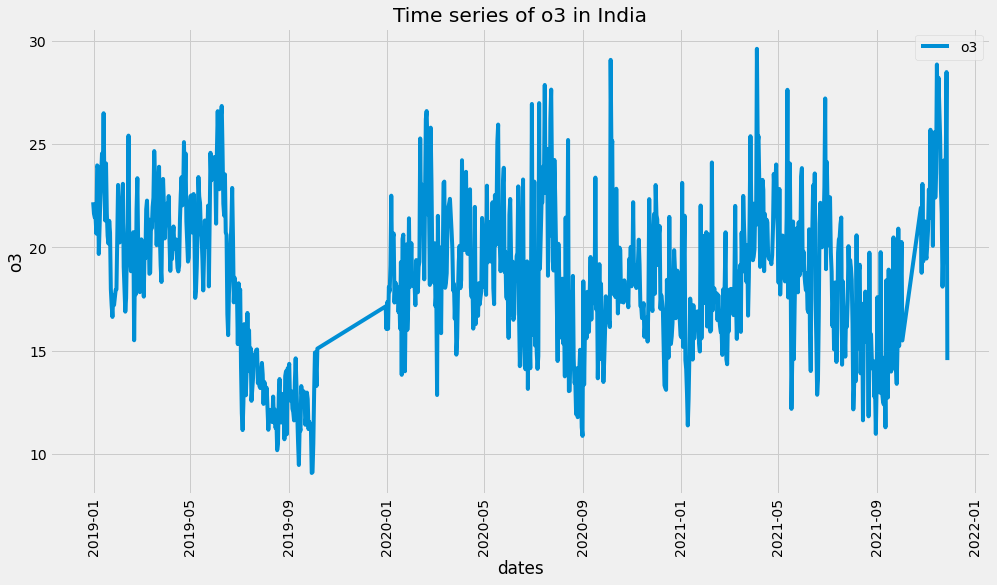

In [85]:
Species=specieSerie('o3')

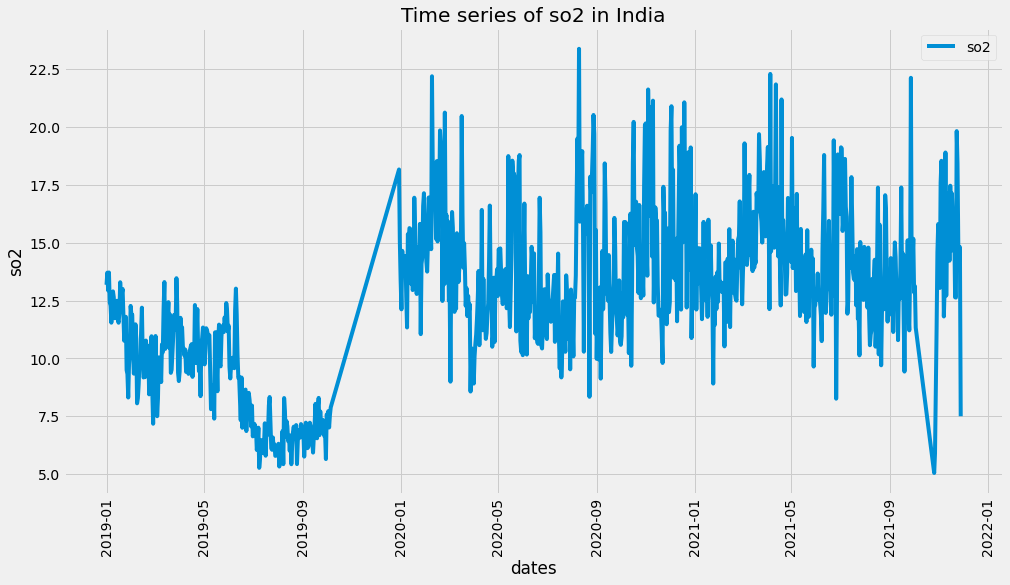

In [86]:
Species=specieSerie('so2')

#### Stationarity analysis

###### processing lockdown dataset

In [87]:
lockdown_india

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
0,India,IN,Nationwide,2020-03-25,2020-06-07,74.0,NaT,NaT,NaN,74.0,National
1,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12.0,12.0,Region
2,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42.0,42.0,Region
3,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7.0,7.0,State
4,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62.0,62.0,State
5,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14.0,14.0,State
6,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29.0,29.0,State
7,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10.0,10.0,State


###### Creating a new dataframe to holds lockdown dates

In [88]:
lockdown_india_new=pd.DataFrame()
lockdown_india_new['Date']=table.index
lockdown_india_new['lockdown']=0

###### Lockdown range

In [89]:
FirstLockdown=list(pd.date_range(start='2020-03-25', end='2020-06-06'))
Secondlockdown=list(pd.date_range(start='2021-04-14', end='2021-06-14'))
lockdown1_2=FirstLockdown + Secondlockdown

##### checking for lockdown dates in our dataframe

In [90]:
FirstL=lockdown_india_new[lockdown_india_new['Date'].isin(FirstLockdown)]
SecondL=lockdown_india_new[lockdown_india_new['Date'].isin(Secondlockdown)]
nolockdown=lockdown_india_new[~lockdown_india_new['Date'].isin(lockdown1_2)]

###### filling 1 for lockdown date and 0 for nolockdown

In [98]:
FirstL['lockdown']=1
SecondL['lockdown']=1
nolockdown['lockdown']=0

In [99]:
Lockdown_df=pd.concat([FirstL,SecondL,nolockdown],axis=0)

In [100]:
#Lockdown_df['Date'].sort_values()
Lockdown_df.sort_values(by='Date',inplace=True)

In [101]:
Lockdown_df.head()


,Date,lockdown
0,2018-12-31,0
1,2019-01-01,0
2,2019-01-02,0
3,2019-01-03,0
4,2019-01-04,0


###### Joining the two datasets

In [103]:
AirQ_df=table
AirQ_df.head()

Specie,co,no2,o3,pm10,pm25,so2
Date,,,,,,
2018-12-31,17.835926,30.350157,22.190798,193.529647,250.134320,13.186394
2019-01-01,19.325919,31.396862,21.638907,207.191952,263.787376,13.708485
2019-01-02,17.086748,31.957523,21.457002,220.919872,253.207165,12.940383
2019-01-03,16.309120,30.154909,21.439854,214.220840,253.555850,13.715534
2019-01-04,13.888484,28.419578,20.672884,173.483173,223.106360,12.421296


In [104]:
AirQ_df.reset_index()

Specie,Date,co,no2,o3,pm10,pm25,so2
0,2018-12-31,17.835926,30.350157,22.190798,193.529647,250.134320,13.186394
1,2019-01-01,19.325919,31.396862,21.638907,207.191952,263.787376,13.708485
2,2019-01-02,17.086748,31.957523,21.457002,220.919872,253.207165,12.940383
3,2019-01-03,16.309120,30.154909,21.439854,214.220840,253.555850,13.715534
4,2019-01-04,13.888484,28.419578,20.672884,173.483173,223.106360,12.421296
...,...,...,...,...,...,...,...
952,2021-11-24,12.514226,22.971780,24.218655,142.119318,166.889946,18.430161
953,2021-11-25,13.691619,22.226278,23.298153,132.840909,177.521286,14.849290
954,2021-11-26,13.955114,22.366146,23.971181,152.351326,187.469656,14.207365
955,2021-11-27,13.355061,20.299432,28.494108,156.183239,186.510417,14.813021


In [105]:
Merged_data=pd.merge(AirQ_df,Lockdown_df,on='Date',how='left')

In [106]:
Merged_data

,Date,co,no2,o3,pm10,pm25,so2,lockdown
0,2018-12-31,17.835926,30.350157,22.190798,193.529647,250.134320,13.186394,0
1,2019-01-01,19.325919,31.396862,21.638907,207.191952,263.787376,13.708485,0
2,2019-01-02,17.086748,31.957523,21.457002,220.919872,253.207165,12.940383,0
3,2019-01-03,16.309120,30.154909,21.439854,214.220840,253.555850,13.715534,0
4,2019-01-04,13.888484,28.419578,20.672884,173.483173,223.106360,12.421296,0
...,...,...,...,...,...,...,...,...
952,2021-11-24,12.514226,22.971780,24.218655,142.119318,166.889946,18.430161,0
953,2021-11-25,13.691619,22.226278,23.298153,132.840909,177.521286,14.849290,0
954,2021-11-26,13.955114,22.366146,23.971181,152.351326,187.469656,14.207365,0
955,2021-11-27,13.355061,20.299432,28.494108,156.183239,186.510417,14.813021,0


## Model